In [2]:
%pylab inline
import pandas as pd
import fastparquet 
import os,sys

Populating the interactive namespace from numpy and matplotlib


In [3]:
sys.path.insert(0,"/mnt/lanlep2019/src/main")

In [4]:
!ln -s /mnt/lanlep2019 ~/

ln: failed to create symbolic link ‘/home/hadoop/lanlep2019’: File exists


In [5]:
os.chdir("/mnt/lanlep2019/")

In [6]:
!pwd

/mnt/lanlep2019


# once

In [7]:
!pip install hyperopt


    100% |████████████████████████████████| 122kB 3.4MB/s ta 0:00:01
    100% |████████████████████████████████| 829kB 1.5MB/s eta 0:00:011
    100% |████████████████████████████████| 1.7MB 870kB/s eta 0:00:011
    100% |████████████████████████████████| 419kB 3.3MB/s  eta 0:00:01
  Running setup.py bdist_wheel for future ... done
  Stored in directory: /home/hadoop/.cache/pip/wheels/0c/61/d2/d6b7317325828fbb39ee6ad559dbe4664d0896da4721bf379e
  Running setup.py bdist_wheel for networkx ... done
  Stored in directory: /home/hadoop/.cache/pip/wheels/68/f8/29/b53346a112a07d30a5a84d53f19aeadaa1a474897c0423af91
Successfully built future networkx
You are using pip version 9.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


# data

In [7]:
import lightgbm as lgb

In [8]:
import data
import config

In [9]:
reload (data)

<module 'data' from '/mnt/lanlep2019/src/main/data.pyc'>

In [10]:
if 1:
    strategy = {'type':'byquake', "test_quakes":[[ 9,  4,  6] , [15,  1,  5], [10, 14,  3],  [7, 11,  2],  [8, 13, 12]]}
    types=['kaggle','signal','kaggle2'] +['fwv','fwvext']+['fwvsoftmax','fwvdis','fwvdis2','fwvcos']+\
        ['fwvextsoftmax','fwvextdis','fwvextdis2','fwvextcos'] + ['fwvwholereg', 'fwvextwholereg']
    traintest = data.TrainTest('dense', coverages=None, types=types, transform=None, valid_strategy=strategy)

In [11]:
traintest.num_dataset()

5

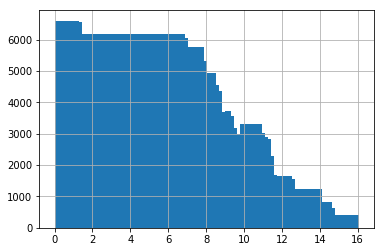

In [12]:
traintest.ydf.hist(bins=100);

In [13]:
np.abs(traintest.ydf-traintest.ydf.median()).mean()

3.02918898210172

In [14]:
testdf=traintest.get_test_data()
testdf.shape

(2624, 450)

In [15]:
datadf=traintest.traindf
datadf.head()

mean        std    max    min  mean_change_abs  \
index                                                                      
quake_03_0200_105000  4.364120   6.262442  119.0 -119.0         0.000000   
quake_06_0120_099000  4.220713  10.566183  328.0 -282.0         0.000007   
quake_07_0296_013500  4.430427   7.501472  159.0 -116.0        -0.000007   
quake_03_0090_034500  4.798247   4.658487  108.0  -76.0         0.000013   
quake_08_0137_055500  4.691327   5.605683  172.0 -171.0        -0.000007   

                      mean_change_rate  abs_max  abs_min  std_first_50000  \
index                                                                       
quake_03_0200_105000      75149.867188    119.0      0.0         4.398645   
quake_06_0120_099000      75124.750000    328.0      0.0         4.937372   
quake_07_0296_013500      74910.898438    159.0      0.0         7.806824   
quake_03_0090_034500      74906.742188    108.0      0.0         5.020636   
quake_08_0137_055500      74864.296875    172.0      0.0         7.771729   

                      std_last_50000       ...         fwvextdis_pca10_2  \
index                                      ...                             
quake_03_0200_105000        7.115628       ...                 -0.867152   
quake_06_0120_099000       17.188982       ...                  0.599042   
quake_07_0296_013500        8.044850       ...                  0.276776   
quake_03_0090_034500        4.439272       ...                 -1.211162   
quake_08_0137_055500        4.222545       ...                 -1.418130   

                      fwvextdis_pca10_3  fwvextdis_pca10_4  fwvextdis_pca10_5  \
index                                                                           
quake_03_0200_105000           0.251729           0.083587           0.029462   
quake_06_0120_099000          -0.058171          -0.059255           0.019930   
quake_07_0296_013500          -0.041059           0.105883           0.042710   
quake_03_0090_034500           0.021516          -0.055162           0.053457   
quake_08_0137_055500          -0.099060          -0.037935          -0.052247   

                      fwvextdis_pca10_6  fwvextdis_pca10_7  fwvextdis_pca10_8  \
index                                                                           
quake_03_0200_105000          -0.022975          -0.039655           0.000274   
quake_06_0120_099000           0.002073           0.007824          -0.008991   
quake_07_0296_013500          -0.009792          -0.018473           0.035101   
quake_03_0090_034500          -0.030760          -0.066036           0.022193   
quake_08_0137_055500           0.054380          -0.019536           0.042780   

                      fwvextdis_pca10_9  fwv_wholereg  fwvext_wholereg  
index                                                                   
quake_03_0200_105000           0.028007     93.940635        -6.822180  
quake_06_0120_099000           0.020008     20.000997       -12.672698  
quake_07_0296_013500          -0.005669     37.947210       -38.633617  
quake_03_0090_034500           0.016614     80.679887        11.746026  
quake_08_0137_055500           0.010705     53.077711         4.727631  

[5 rows x 450 columns]

In [16]:
ydf=traintest.ydf
ydf.head()

index
quake_03_0200_105000    0.998098
quake_06_0120_099000    2.318898
quake_07_0296_013500    4.532197
quake_03_0090_034500    5.302996
quake_08_0137_055500    2.514399
Name: y, dtype: float64

In [17]:
qdf=pd.DataFrame(datadf.index.map(lambda u: u.split("_")[1]).astype(np.int8),index=datadf.index)
qdf.head()

index
index                      
quake_03_0200_105000      3
quake_06_0120_099000      6
quake_07_0296_013500      7
quake_03_0090_034500      3
quake_08_0137_055500      8

In [18]:
qdf['index'].value_counts().to_frame().sort_index().T

0      1      2      3      4      5      6      7      8      9   \
index  3672  29520  36295  22631  32480  20574  18018  41240  20192  24635   

          10     11     12     13     14     15    16  
index  29228  28196  22560  21885  37761  24179  4674

In [19]:
qdf.shape,ydf.shape,datadf.shape

((417740, 1), (417740,), (417740, 450))

In [20]:
quakes=range(1,16)
quakes

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [21]:
idx=qdf['index'].isin(set(quakes)).values
ydf=ydf[idx]
qdf=qdf[idx]
datadf=datadf[idx]

In [22]:
qdf.shape,ydf.shape,datadf.shape

((409394, 1), (409394,), (409394, 450))

In [23]:
quake_duration= config.quake_length
quake_duration

{1: 11.540566395569977,
 2: 14.180203599212305,
 3: 8.856243408447243,
 4: 12.693878224447909,
 5: 8.05509606419685,
 6: 7.059247509412199,
 7: 16.107000305270187,
 8: 7.906144318432936,
 9: 9.637176132666621,
 10: 11.4267247041647,
 11: 11.0245547308509,
 12: 8.828581201128031,
 13: 8.565787763958841,
 14: 14.7515396785698,
 15: 9.459497978791095}

In [24]:
for qno in quakes:
    r=11/quake_duration[qno]
    print qno, r
    ydf.loc[qdf['index']==qno] *= r

1 0.95315945708
2 0.775729341475
3 1.24206161605
4 0.866559439558
5 1.36559513534
6 1.55823973948
7 0.682932873379
8 1.39132294542
9 1.14141319496
10 0.962655553957
11 0.997772723575
12 1.24595331338
13 1.28417844373
14 0.745684873558
15 1.16285240767


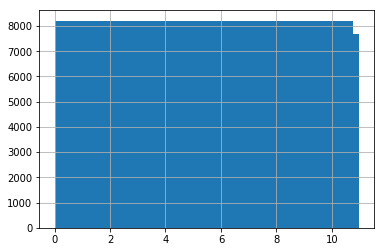

In [25]:
ydf.hist(bins=50);

In [26]:
import utils
n_thread= utils.get_num_thread()
n_thread

35

In [27]:
from hyperopt import fmin, tpe, hp


In [28]:
w={k:v/np.mean(config.quake_weights.values()) for k,v in config.quake_weights.items()}
wdf=qdf['index'].map(lambda u: w[u])
wdf.head()

index
quake_03_0200_105000    0.416667
quake_06_0120_099000    0.416667
quake_07_0296_013500    1.111111
quake_03_0090_034500    0.416667
quake_08_0137_055500    0.416667
Name: index, dtype: float64

In [29]:
def train_quake(qno,params,n_thread):
    assert(qno in quakes)
    print 'valid quake', qno
    teidx=(qdf['index']==qno).values
    tridx=~qdf['index'].isin({qno,0,16}).values
    
    Xtr,ytr,Xte,yte=datadf[tridx],ydf[tridx],datadf[teidx],ydf[teidx]
    Wtr,Wte=wdf[tridx],wdf[teidx]
    Xtr,ytr,Xte,yte, Wtr, Wte=[u.values for u in [Xtr,ytr,Xte,yte, Wtr,Wte]]
    print Xtr.shape,ytr.shape,Xte.shape,yte.shape
    model = lgb.LGBMRegressor(n_estimators = 5000, n_jobs = n_thread, **params)
    model.fit(Xtr, ytr, sample_weight=None,
                    eval_set=[(Xtr, ytr), (Xte, yte)], eval_metric='mae', eval_sample_weight=[None,None],
                    verbose=100, early_stopping_rounds=100)
    return model.best_score['valid_1']['l1'], model.best_iteration

In [30]:
params = {'num_leaves': 54,
          'min_data_in_leaf': 79,
          'objective': 'regression_l1f1',
          'max_depth': -1,
          'learning_rate': 0.01,
          "boosting": "gbdt",
          "bagging_freq": 5,
          "bagging_fraction": 0.8126672064208567,
          "bagging_seed": 11,
          "metric": 'mae',
          "verbosity": -1,
          'reg_alpha': 0.1302650970728192,
          'reg_lambda': 0.3603427518866501
         }

In [31]:
best_mae=1e10

In [32]:
def lgbcv(learning_rate, num_leaves,reg_alpha,reg_lambda,max_depth,
          subsample,colsample_bytree, min_data_in_leaf,min_sum_hessian_in_leaf,
         fair_c):
    d=locals()
    newparams=params.copy()
    newparams.update(d)    
    newparams['num_leaves']=int(num_leaves)
    newparams['max_depth']=int(max_depth)
    newparams['min_data_in_leaf']=int(min_data_in_leaf)
    scores=[]
    validScores={}
    for qno in quakes:
        s=train_quake(qno,newparams,n_thread)
        print "quake ", qno,s
        validScores[qno]=s
        scores.append(s[0])
    r=np.mean(scores)
    global best_mae
    if best_mae>r: best_mae=r
    print "mean score", r
    return r

In [36]:
space={
   'num_leaves': hp.uniform('num_leaves', 32,128 ),
    'reg_alpha':hp.loguniform('reg_alpha', np.log(0.01),np.log(10) ),
    'reg_lambda':hp.loguniform('reg_lambda', np.log(0.01),np.log(10) ),
    'max_depth':hp.uniform('max_depth',  3,10 ),
    'subsample':hp.uniform('subsample',  0.3,1 ),
    'colsample_bytree':hp.uniform('colsample_bytree',  0.3,1 ),
    'min_data_in_leaf':hp.loguniform('min_data_in_leaf', np.log(5),np.log(3000) ),
    'min_sum_hessian_in_leaf':hp.loguniform('min_sum_hessian_in_leaf', np.log(1e-3),np.log(3) ),
    'learning_rate':hp.loguniform('learning_rate', np.log(1e-3),np.log(0.01) ),
    'fair_c':hp.loguniform('fair_c', np.log(1e-3),np.log(0.1) ),
}

In [37]:
def objective(args):
    print args
    return lgbcv(**args)



In [38]:
best = fmin(fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=100)
print best

{'num_leaves': 36.59946117820212, 'reg_alpha': 0.6352967783601431, 'colsample_bytree': 0.30664979148716975, 'learning_rate': 0.004879835179073979, 'fair_c': 0.05778500286454196, 'subsample': 0.8275393119959025, 'reg_lambda': 3.998089098278113, 'min_data_in_leaf': 11.477185920923626, 'max_depth': 8.955112470472066, 'min_sum_hessian_in_leaf': 0.0037116627715955137}
valid quake                                          
1                                                    
(379874, 450)                                        
(379874,)                                            
(29520, 450)                                         
(29520,)                                             
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.02888	valid_1's l1: 1.32057   
[200]	training's l1: 0.873904	valid_1's l1: 1.2461   
[300]	training's l1: 0.787866	valid_1's l1: 1.23451  
[400]	training's l1: 0.720839	valid_1's l1: 1.23176  
Early stopping, best iteration 

(380166, 450)                                        
(380166,)                                            
(29228, 450)                                         
(29228,)                                             
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.04579	valid_1's l1: 1.0813    
[200]	training's l1: 0.886553	valid_1's l1: 1.04066  
[300]	training's l1: 0.800018	valid_1's l1: 1.03362  
[400]	training's l1: 0.733964	valid_1's l1: 1.0323   
Early stopping, best iteration is:                   
[336]	training's l1: 0.775016	valid_1's l1: 1.02964
quake                                                
10                                                   
(1.029641663463337, 336)                             
valid quake                                          
11                                                   
(381198, 450)                                        
(381198,)                                            
(28196, 450)         

Training until validation scores don't improve for 100 rounds.             
[100]	training's l1: 0.908695	valid_1's l1: 0.895304                       
[200]	training's l1: 0.750826	valid_1's l1: 0.857361                       
[300]	training's l1: 0.646506	valid_1's l1: 0.855716                       
Early stopping, best iteration is:                                         
[235]	training's l1: 0.714724	valid_1's l1: 0.849393
quake                                                                      
3                                                                          
(0.8493925006496874, 235)                                                  
valid quake                                                                
4                                                                          
(376914, 450)                                                              
(376914,)                                                                  
(32480, 450)                       

quake                                                                      
10                                                                         
(1.0339594388075422, 233)                                                  
valid quake                                                                
11                                                                         
(381198, 450)                                                              
(381198,)                                                                  
(28196, 450)                                                               
(28196,)                                                                   
Training until validation scores don't improve for 100 rounds.             
[100]	training's l1: 0.900392	valid_1's l1: 1.04068                        
[200]	training's l1: 0.73289	valid_1's l1: 1.04743                         
Early stopping, best iteration is:                                         
[142]	traini

[300]	training's l1: 1.00842	valid_1's l1: 1.34457                         
[400]	training's l1: 0.97783	valid_1's l1: 1.34054                         
[500]	training's l1: 0.947106	valid_1's l1: 1.33882                        
Early stopping, best iteration is:                                         
[455]	training's l1: 0.961535	valid_1's l1: 1.33574
quake                                                                      
2                                                                          
(1.3357381530823096, 455)                                                  
valid quake                                                                
3                                                                          
(386763, 450)                                                              
(386763,)                                                                  
(22631, 450)                                                               
(22631,)                            

Early stopping, best iteration is:                                         
[652]	training's l1: 0.913262	valid_1's l1: 1.34458
quake                                                                      
8                                                                          
(1.3445795286444986, 652)                                                  
valid quake                                                                
9                                                                          
(384759, 450)                                                              
(384759,)                                                                  
(24635, 450)                                                               
(24635,)                                                                   
Training until validation scores don't improve for 100 rounds.             
[100]	training's l1: 1.22521	valid_1's l1: 1.07326                         
[200]	training's l1: 1.08277	valid_1

(24179, 450)                                                               
(24179,)                                                                   
Training until validation scores don't improve for 100 rounds.             
[100]	training's l1: 1.22211	valid_1's l1: 1.17647                         
[200]	training's l1: 1.07479	valid_1's l1: 1.13401                         
[300]	training's l1: 1.02833	valid_1's l1: 1.12131                         
[400]	training's l1: 0.997894	valid_1's l1: 1.11878                        
Early stopping, best iteration is:                                         
[390]	training's l1: 1.00047	valid_1's l1: 1.1168
quake                                                                      
15                                                                         
(1.1168018484838227, 390)                                                  
mean score                                                                 
1.15402841596562                      

[200]	training's l1: 1.14925	valid_1's l1: 1.42794                          
[300]	training's l1: 1.07411	valid_1's l1: 1.36962                          
[400]	training's l1: 1.03932	valid_1's l1: 1.34546                          
[500]	training's l1: 1.0166	valid_1's l1: 1.33531                           
[600]	training's l1: 0.998185	valid_1's l1: 1.32939                         
[700]	training's l1: 0.98152	valid_1's l1: 1.32442                          
[800]	training's l1: 0.961513	valid_1's l1: 1.32331                         
[900]	training's l1: 0.94437	valid_1's l1: 1.3248                           
Early stopping, best iteration is:                                          
[805]	training's l1: 0.960648	valid_1's l1: 1.32269
quake                                                                       
5                                                                           
(1.322690832405943, 805)                                                    
valid quake             

[300]	training's l1: 1.08685	valid_1's l1: 1.03943                          
[400]	training's l1: 1.05081	valid_1's l1: 1.02286                          
[500]	training's l1: 1.0274	valid_1's l1: 1.01155                           
[600]	training's l1: 1.00925	valid_1's l1: 1.00658                          
[700]	training's l1: 0.993913	valid_1's l1: 1.00087                         
[800]	training's l1: 0.974634	valid_1's l1: 1.00093                         
Early stopping, best iteration is:                                          
[753]	training's l1: 0.982968	valid_1's l1: 0.999877
quake                                                                       
10                                                                          
(0.9998770282443139, 753)                                                   
valid quake                                                                 
11                                                                          
(381198, 450)          

1.1524583514516276                                                          
{'num_leaves': 125.64747628114173, 'reg_alpha': 0.03922133421899014, 'colsample_bytree': 0.8988655087445305, 'learning_rate': 0.003176050462077862, 'fair_c': 0.007021370601848414, 'subsample': 0.9203176808910116, 'reg_lambda': 0.8774273517368308, 'min_data_in_leaf': 13.425073810500509, 'max_depth': 5.424929570837946, 'min_sum_hessian_in_leaf': 0.009799422170906222}
valid quake                                                                 
1                                                                           
(379874, 450)                                                               
(379874,)                                                                   
(29520, 450)                                                                
(29520,)                                                                    
Training until validation scores don't improve for 100 rounds.              
[100]	training's

6                                                                           
(1.355019387316628, 501)                                                    
valid quake                                                                 
7                                                                           
(368154, 450)                                                               
(368154,)                                                                   
(41240, 450)                                                                
(41240,)                                                                    
Training until validation scores don't improve for 100 rounds.              
[100]	training's l1: 1.1634	valid_1's l1: 1.52655                           
[200]	training's l1: 0.993018	valid_1's l1: 1.39531                         
[300]	training's l1: 0.932086	valid_1's l1: 1.37346                         
[400]	training's l1: 0.892169	valid_1's l1: 1.36751                         

(387509,)                                                                   
(21885, 450)                                                                
(21885,)                                                                    
Training until validation scores don't improve for 100 rounds.              
[100]	training's l1: 1.19753	valid_1's l1: 1.2663                           
[200]	training's l1: 1.02804	valid_1's l1: 1.113                            
[300]	training's l1: 0.967389	valid_1's l1: 1.07254                         
[400]	training's l1: 0.927455	valid_1's l1: 1.06438                         
[500]	training's l1: 0.889008	valid_1's l1: 1.06311                         
[600]	training's l1: 0.849462	valid_1's l1: 1.06353                         
Early stopping, best iteration is:                                          
[560]	training's l1: 0.863433	valid_1's l1: 1.06179
quake                                                                       
13                      

Early stopping, best iteration is:                                          
[150]	training's l1: 0.949914	valid_1's l1: 1.08036
quake                                                                       
4                                                                           
(1.0803560367174827, 150)                                                   
valid quake                                                                 
5                                                                           
(388820, 450)                                                               
(388820,)                                                                   
(20574, 450)                                                                
(20574,)                                                                    
Training until validation scores don't improve for 100 rounds.              
[100]	training's l1: 1.00064	valid_1's l1: 1.35824                          
[200]	training's l1: 0.9

(386834,)                                                                   
(22560, 450)                                                                
(22560,)                                                                    
Training until validation scores don't improve for 100 rounds.              
[100]	training's l1: 1.01367	valid_1's l1: 1.00033                          
[200]	training's l1: 0.921715	valid_1's l1: 0.967766                        
[300]	training's l1: 0.84597	valid_1's l1: 0.96602                          
Early stopping, best iteration is:                                          
[265]	training's l1: 0.870538	valid_1's l1: 0.962485
quake                                                                       
12                                                                          
(0.9624851700135646, 265)                                                   
valid quake                                                                 
13                     

(376914,)                                                                   
(32480, 450)                                                                
(32480,)                                                                    
Training until validation scores don't improve for 100 rounds.              
[100]	training's l1: 0.817091	valid_1's l1: 1.09795                         
[200]	training's l1: 0.666735	valid_1's l1: 1.12645                         
Early stopping, best iteration is:                                          
[101]	training's l1: 0.815016	valid_1's l1: 1.09705
quake                                                                       
4                                                                           
(1.0970499611423168, 101)                                                   
valid quake                                                                 
5                                                                           
(388820, 450)           

(1.0417757251876716, 133)                                                   
valid quake                                                                 
12                                                                          
(386834, 450)                                                               
(386834,)                                                                   
(22560, 450)                                                                
(22560,)                                                                    
Training until validation scores don't improve for 100 rounds.              
[100]	training's l1: 0.831249	valid_1's l1: 0.991468                        
[200]	training's l1: 0.680941	valid_1's l1: 0.982359                        
Early stopping, best iteration is:                                          
[135]	training's l1: 0.767619	valid_1's l1: 0.975662
quake                                                                       
12                     

[800]	training's l1: 0.9656	valid_1's l1: 1.36636                           
[900]	training's l1: 0.948894	valid_1's l1: 1.36286                         
[1000]	training's l1: 0.935157	valid_1's l1: 1.36093                        
[1100]	training's l1: 0.923014	valid_1's l1: 1.35847                        
[1200]	training's l1: 0.911662	valid_1's l1: 1.35859                        
Early stopping, best iteration is:                                          
[1106]	training's l1: 0.922288	valid_1's l1: 1.35824
quake                                                                       
2                                                                           
(1.3582409524810855, 1106)                                                  
valid quake                                                                 
3                                                                           
(386763, 450)                                                               
(386763,)              

quake                                                                       
6                                                                           
(1.3873955313771802, 1387)                                                  
valid quake                                                                 
7                                                                           
(368154, 450)                                                               
(368154,)                                                                   
(41240, 450)                                                                
(41240,)                                                                    
Training until validation scores don't improve for 100 rounds.              
[100]	training's l1: 1.84149	valid_1's l1: 2.11519                          
[200]	training's l1: 1.31394	valid_1's l1: 1.68386                          
[300]	training's l1: 1.16327	valid_1's l1: 1.52513                          

quake                                                                       
10                                                                          
(1.0089214741693406, 1514)                                                  
valid quake                                                                 
11                                                                          
(381198, 450)                                                               
(381198,)                                                                   
(28196, 450)                                                                
(28196,)                                                                    
Training until validation scores don't improve for 100 rounds.              
[100]	training's l1: 1.87597	valid_1's l1: 1.84704                          
[200]	training's l1: 1.3565	valid_1's l1: 1.2996                            
[300]	training's l1: 1.20468	valid_1's l1: 1.12929                          

[400]	training's l1: 1.11993	valid_1's l1: 1.15565                          
[500]	training's l1: 1.06547	valid_1's l1: 1.13827                          
[600]	training's l1: 1.03003	valid_1's l1: 1.13238                          
[700]	training's l1: 1.0056	valid_1's l1: 1.12616                           
[800]	training's l1: 0.985899	valid_1's l1: 1.12332                         
Early stopping, best iteration is:                                          
[747]	training's l1: 0.995984	valid_1's l1: 1.12187
quake                                                                       
15                                                                          
(1.1218698999769188, 747)                                                   
mean score                                                                  
1.160850085474572                                                           
{'num_leaves': 111.5992868923252, 'reg_alpha': 0.017504905533285268, 'colsample_bytree': 0.7852014928

(391376, 450)                                                                
(391376,)                                                                    
(18018, 450)                                                                 
(18018,)                                                                     
Training until validation scores don't improve for 100 rounds.               
[100]	training's l1: 1.15523	valid_1's l1: 1.4994                            
[200]	training's l1: 0.957896	valid_1's l1: 1.41217                          
[300]	training's l1: 0.883615	valid_1's l1: 1.38978                          
[400]	training's l1: 0.83415	valid_1's l1: 1.37685                           
[500]	training's l1: 0.794188	valid_1's l1: 1.37132                          
[600]	training's l1: 0.745121	valid_1's l1: 1.37267                          
Early stopping, best iteration is:                                           
[565]	training's l1: 0.761339	valid_1's l1: 1.36874
quake       

(22560,)                                                                     
Training until validation scores don't improve for 100 rounds.               
[100]	training's l1: 1.17057	valid_1's l1: 1.15347                           
[200]	training's l1: 0.974689	valid_1's l1: 1.01241                          
[300]	training's l1: 0.900794	valid_1's l1: 0.974919                         
[400]	training's l1: 0.850486	valid_1's l1: 0.961742                         
[500]	training's l1: 0.805634	valid_1's l1: 0.957637                         
[600]	training's l1: 0.757887	valid_1's l1: 0.954364                         
[700]	training's l1: 0.717887	valid_1's l1: 0.955655                         
Early stopping, best iteration is:                                           
[628]	training's l1: 0.746619	valid_1's l1: 0.953041
quake                                                                        
12                                                                           
(0.95304088

(22631,)                                                                     
Training until validation scores don't improve for 100 rounds.               
[100]	training's l1: 1.06999	valid_1's l1: 0.871891                          
[200]	training's l1: 0.99698	valid_1's l1: 0.838796                          
[300]	training's l1: 0.938445	valid_1's l1: 0.844271                         
Early stopping, best iteration is:                                           
[201]	training's l1: 0.996389	valid_1's l1: 0.838702
quake                                                                        
3                                                                            
(0.8387017000560579, 201)                                                    
valid quake                                                                  
4                                                                            
(376914, 450)                                                                
(376914,)  

[200]	training's l1: 0.987225	valid_1's l1: 1.00114                          
[300]	training's l1: 0.927805	valid_1's l1: 1.00456                          
Early stopping, best iteration is:                                           
[200]	training's l1: 0.987225	valid_1's l1: 1.00114
quake                                                                        
10                                                                           
(1.0011413143491892, 200)                                                    
valid quake                                                                  
11                                                                           
(381198, 450)                                                                
(381198,)                                                                    
(28196, 450)                                                                 
(28196,)                                                                     
Training unt

(36295, 450)                                                                   
(36295,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.00633	valid_1's l1: 1.35548                             
[200]	training's l1: 0.924343	valid_1's l1: 1.34175                            
[300]	training's l1: 0.853375	valid_1's l1: 1.34937                            
Early stopping, best iteration is:                                             
[200]	training's l1: 0.924343	valid_1's l1: 1.34175
quake                                                                          
2                                                                              
(1.3417475257453642, 200)                                                      
valid quake                                                                    
3                                                                   

(24635,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.03084	valid_1's l1: 0.943787                            
[200]	training's l1: 0.945613	valid_1's l1: 0.936622                           
Early stopping, best iteration is:                                             
[177]	training's l1: 0.962005	valid_1's l1: 0.933908
quake                                                                          
9                                                                              
(0.933907983783644, 177)                                                       
valid quake                                                                    
10                                                                             
(380166, 450)                                                                  
(380166,)                                                          

1                                                                              
(379874, 450)                                                                  
(379874,)                                                                      
(29520, 450)                                                                   
(29520,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.76934	valid_1's l1: 1.88212                             
[200]	training's l1: 1.29895	valid_1's l1: 1.43181                             
[300]	training's l1: 1.17543	valid_1's l1: 1.35232                             
[400]	training's l1: 1.11017	valid_1's l1: 1.3071                              
[500]	training's l1: 1.07337	valid_1's l1: 1.27761                             
[600]	training's l1: 1.0514	valid_1's l1: 1.25907                              
[700]	training's l1: 1.03467	valid_1's l

[200]	training's l1: 1.30229	valid_1's l1: 1.51663                             
[300]	training's l1: 1.18161	valid_1's l1: 1.45144                             
[400]	training's l1: 1.11525	valid_1's l1: 1.40135                             
[500]	training's l1: 1.07724	valid_1's l1: 1.37137                             
[600]	training's l1: 1.0536	valid_1's l1: 1.35216                              
[700]	training's l1: 1.03667	valid_1's l1: 1.34377                             
[800]	training's l1: 1.02287	valid_1's l1: 1.33654                             
[900]	training's l1: 1.0107	valid_1's l1: 1.33107                              
[1000]	training's l1: 1.00057	valid_1's l1: 1.32875                            
[1100]	training's l1: 0.991263	valid_1's l1: 1.32715                           
[1200]	training's l1: 0.982062	valid_1's l1: 1.32581                           
[1300]	training's l1: 0.970195	valid_1's l1: 1.32441                           
Early stopping, best iteration is:      

[600]	training's l1: 1.07142	valid_1's l1: 0.925341                            
[700]	training's l1: 1.054	valid_1's l1: 0.920132                              
[800]	training's l1: 1.03977	valid_1's l1: 0.916724                            
[900]	training's l1: 1.02777	valid_1's l1: 0.914338                            
[1000]	training's l1: 1.01736	valid_1's l1: 0.911864                           
[1100]	training's l1: 1.00833	valid_1's l1: 0.90788                            
[1200]	training's l1: 1.00044	valid_1's l1: 0.906132                           
[1300]	training's l1: 0.990836	valid_1's l1: 0.905273                          
[1400]	training's l1: 0.979307	valid_1's l1: 0.904896                          
Early stopping, best iteration is:                                             
[1352]	training's l1: 0.984598	valid_1's l1: 0.904647
quake                                                                          
9                                                                 

[700]	training's l1: 1.04531	valid_1's l1: 1.08212                             
[800]	training's l1: 1.03186	valid_1's l1: 1.07352                             
[900]	training's l1: 1.0203	valid_1's l1: 1.06829                              
[1000]	training's l1: 1.00912	valid_1's l1: 1.0634                             
[1100]	training's l1: 0.999952	valid_1's l1: 1.06005                           
[1200]	training's l1: 0.991567	valid_1's l1: 1.05922                           
[1300]	training's l1: 0.980935	valid_1's l1: 1.058                             
[1400]	training's l1: 0.968041	valid_1's l1: 1.05774                           
Early stopping, best iteration is:                                             
[1345]	training's l1: 0.974696	valid_1's l1: 1.05648
quake                                                                          
13                                                                             
(1.0564759822451488, 1345)                                         

Early stopping, best iteration is:                                            
[451]	training's l1: 0.552572	valid_1's l1: 0.850419
quake                                                                         
3                                                                             
(0.8504191170687554, 451)                                                     
valid quake                                                                   
4                                                                             
(376914, 450)                                                                 
(376914,)                                                                     
(32480, 450)                                                                  
(32480,)                                                                      
Training until validation scores don't improve for 100 rounds.                
[100]	training's l1: 1.03059	valid_1's l1: 1.21412                            

(29228, 450)                                                                  
(29228,)                                                                      
Training until validation scores don't improve for 100 rounds.                
[100]	training's l1: 1.04033	valid_1's l1: 1.16935                            
[200]	training's l1: 0.777824	valid_1's l1: 1.07039                           
[300]	training's l1: 0.651779	valid_1's l1: 1.05236                           
[400]	training's l1: 0.568016	valid_1's l1: 1.04239                           
[500]	training's l1: 0.503452	valid_1's l1: 1.04391                           
Early stopping, best iteration is:                                            
[447]	training's l1: 0.538636	valid_1's l1: 1.04127
quake                                                                         
10                                                                            
(1.0412741501991625, 447)                                                     


(29520, 450)                                                                   
(29520,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.06413	valid_1's l1: 1.27212                             
[200]	training's l1: 1.00028	valid_1's l1: 1.24553                             
[300]	training's l1: 0.956628	valid_1's l1: 1.24111                            
Early stopping, best iteration is:                                             
[294]	training's l1: 0.958717	valid_1's l1: 1.24033
quake                                                                          
1                                                                              
(1.240331091273823, 294)                                                       
valid quake                                                                    
2                                                                   

(389202,)                                                                      
(20192, 450)                                                                   
(20192,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.06362	valid_1's l1: 1.41782                             
[200]	training's l1: 1.00146	valid_1's l1: 1.37168                             
[300]	training's l1: 0.956209	valid_1's l1: 1.36451                            
Early stopping, best iteration is:                                             
[296]	training's l1: 0.957888	valid_1's l1: 1.36279
quake                                                                          
8                                                                              
(1.3627869063678653, 296)                                                      
valid quake                                                         

(24179,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.08072	valid_1's l1: 1.15709                             
[200]	training's l1: 1.01762	valid_1's l1: 1.12675                             
[300]	training's l1: 0.969627	valid_1's l1: 1.11965                            
[400]	training's l1: 0.933723	valid_1's l1: 1.12272                            
Early stopping, best iteration is:                                             
[335]	training's l1: 0.957658	valid_1's l1: 1.11209
quake                                                                          
15                                                                             
(1.1120904557735107, 335)                                                      
mean score                                                                     
1.1587243961193159                                                  

Early stopping, best iteration is:                                            
[1047]	training's l1: 1.00626	valid_1's l1: 1.06437
quake                                                                         
4                                                                             
(1.0643721559193196, 1047)                                                    
valid quake                                                                   
5                                                                             
(388820, 450)                                                                 
(388820,)                                                                     
(20574, 450)                                                                  
(20574,)                                                                      
Training until validation scores don't improve for 100 rounds.                
[100]	training's l1: 1.66765	valid_1's l1: 1.75654                            


valid quake                                                                   
9                                                                             
(384759, 450)                                                                 
(384759,)                                                                     
(24635, 450)                                                                  
(24635,)                                                                      
Training until validation scores don't improve for 100 rounds.                
[100]	training's l1: 1.68772	valid_1's l1: 1.52449                            
[200]	training's l1: 1.28081	valid_1's l1: 1.12459                            
[300]	training's l1: 1.17034	valid_1's l1: 1.01254                            
[400]	training's l1: 1.11438	valid_1's l1: 0.954071                           
[500]	training's l1: 1.08389	valid_1's l1: 0.929502                           
[600]	training's l1: 1.06341	valid_1's l1: 0.923178 

[700]	training's l1: 1.04245	valid_1's l1: 1.06842                            
[800]	training's l1: 1.02971	valid_1's l1: 1.06268                            
[900]	training's l1: 1.01953	valid_1's l1: 1.05836                            
[1000]	training's l1: 1.01083	valid_1's l1: 1.05625                           
[1100]	training's l1: 1.00154	valid_1's l1: 1.05522                           
[1200]	training's l1: 0.990832	valid_1's l1: 1.05515                          
Early stopping, best iteration is:                                            
[1183]	training's l1: 0.992593	valid_1's l1: 1.05434
quake                                                                         
13                                                                            
(1.0543390539272128, 1183)                                                    
valid quake                                                                   
14                                                                            

Early stopping, best iteration is:                                             
[450]	training's l1: 0.832171	valid_1's l1: 0.86864
quake                                                                          
3                                                                              
(0.8686403383126989, 450)                                                      
valid quake                                                                    
4                                                                              
(376914, 450)                                                                  
(376914,)                                                                      
(32480, 450)                                                                   
(32480,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.16139	valid_1's l1: 1.20242                  

9                                                                              
(0.9331936622329271, 455)                                                      
valid quake                                                                    
10                                                                             
(380166, 450)                                                                  
(380166,)                                                                      
(29228, 450)                                                                   
(29228,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.16627	valid_1's l1: 1.18217                             
[200]	training's l1: 0.959132	valid_1's l1: 1.07051                            
[300]	training's l1: 0.882622	valid_1's l1: 1.05732                            
[400]	training's l1: 0.839695	valid_1's 

1.1779534524077135                                                             
{'num_leaves': 76.62101767828943, 'reg_alpha': 0.3201894710492207, 'colsample_bytree': 0.8629482579131653, 'learning_rate': 0.008306585526107434, 'fair_c': 0.01471103649986488, 'subsample': 0.845311311840309, 'reg_lambda': 0.31593314273443335, 'min_data_in_leaf': 190.68815763379928, 'max_depth': 5.147115944308505, 'min_sum_hessian_in_leaf': 0.004596252899724597}
valid quake                                                                    
1                                                                              
(379874, 450)                                                                  
(379874,)                                                                      
(29520, 450)                                                                   
(29520,)                                                                       
Training until validation scores don't improve for 100 rounds.             

valid quake                                                                    
8                                                                              
(389202, 450)                                                                  
(389202,)                                                                      
(20192, 450)                                                                   
(20192,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 0.981379	valid_1's l1: 1.38725                            
[200]	training's l1: 0.881694	valid_1's l1: 1.35905                            
[300]	training's l1: 0.80851	valid_1's l1: 1.35119                             
[400]	training's l1: 0.753394	valid_1's l1: 1.34479                            
[500]	training's l1: 0.709701	valid_1's l1: 1.34928                            
Early stopping, best iteration is:      

(24179, 450)                                                                   
(24179,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 0.994354	valid_1's l1: 1.17286                            
[200]	training's l1: 0.896916	valid_1's l1: 1.16177                            
[300]	training's l1: 0.826926	valid_1's l1: 1.15682                            
[400]	training's l1: 0.769462	valid_1's l1: 1.15867                            
Early stopping, best iteration is:                                             
[313]	training's l1: 0.821554	valid_1's l1: 1.15364
quake                                                                          
15                                                                             
(1.153640809898645, 313)                                                       
mean score                                                          

6                                                                             
(1.341728997432578, 378)                                                      
valid quake                                                                   
7                                                                             
(368154, 450)                                                                 
(368154,)                                                                     
(41240, 450)                                                                  
(41240,)                                                                      
Training until validation scores don't improve for 100 rounds.                
[100]	training's l1: 1.0733	valid_1's l1: 1.37237                             
[200]	training's l1: 1.01708	valid_1's l1: 1.35701                            
[300]	training's l1: 0.977565	valid_1's l1: 1.35764                           
Early stopping, best iteration is:                  

14                                                                            
(371633, 450)                                                                 
(371633,)                                                                     
(37761, 450)                                                                  
(37761,)                                                                      
Training until validation scores don't improve for 100 rounds.                
[100]	training's l1: 1.06724	valid_1's l1: 1.42685                            
[200]	training's l1: 1.01044	valid_1's l1: 1.42951                            
Early stopping, best iteration is:                                            
[124]	training's l1: 1.047	valid_1's l1: 1.42275
quake                                                                         
14                                                                            
(1.4227455547084666, 124)                                                     
val

(376914,)                                                                      
(32480, 450)                                                                   
(32480,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.46437	valid_1's l1: 1.47613                             
[200]	training's l1: 1.15521	valid_1's l1: 1.15409                             
[300]	training's l1: 1.05444	valid_1's l1: 1.09104                             
[400]	training's l1: 1.00493	valid_1's l1: 1.08162                             
[500]	training's l1: 0.971281	valid_1's l1: 1.08017                            
[600]	training's l1: 0.946295	valid_1's l1: 1.07987                            
Early stopping, best iteration is:                                             
[554]	training's l1: 0.957382	valid_1's l1: 1.07843
quake                                                               

[100]	training's l1: 1.47279	valid_1's l1: 1.3342                              
[200]	training's l1: 1.16442	valid_1's l1: 1.04766                             
[300]	training's l1: 1.06268	valid_1's l1: 0.957212                            
[400]	training's l1: 1.01351	valid_1's l1: 0.925172                            
[500]	training's l1: 0.983021	valid_1's l1: 0.916225                           
[600]	training's l1: 0.957581	valid_1's l1: 0.912793                           
[700]	training's l1: 0.935086	valid_1's l1: 0.911243                           
[800]	training's l1: 0.917332	valid_1's l1: 0.90947                            
[900]	training's l1: 0.893856	valid_1's l1: 0.909445                           
Early stopping, best iteration is:                                             
[873]	training's l1: 0.900822	valid_1's l1: 0.908465
quake                                                                          
9                                                                  

[200]	training's l1: 1.11823	valid_1's l1: 1.50381                             
[300]	training's l1: 1.02127	valid_1's l1: 1.44139                             
[400]	training's l1: 0.973556	valid_1's l1: 1.42954                            
[500]	training's l1: 0.941393	valid_1's l1: 1.4288                             
[600]	training's l1: 0.916057	valid_1's l1: 1.4311                             
Early stopping, best iteration is:                                             
[533]	training's l1: 0.932535	valid_1's l1: 1.42827
quake                                                                          
14                                                                             
(1.4282671846250923, 533)                                                      
valid quake                                                                    
15                                                                             
(385215, 450)                                                       

[100]	training's l1: 0.861773	valid_1's l1: 1.36875                            
[200]	training's l1: 0.673866	valid_1's l1: 1.34216                            
[300]	training's l1: 0.57117	valid_1's l1: 1.34158                             
Early stopping, best iteration is:                                             
[276]	training's l1: 0.592648	valid_1's l1: 1.33878
quake                                                                          
5                                                                              
(1.3387847203473935, 276)                                                      
valid quake                                                                    
6                                                                              
(391376, 450)                                                                  
(391376,)                                                                      
(18018, 450)                                                        

[100]	training's l1: 0.872119	valid_1's l1: 1.01271                            
[200]	training's l1: 0.687584	valid_1's l1: 0.964717                           
[300]	training's l1: 0.57564	valid_1's l1: 0.967653                            
Early stopping, best iteration is:                                             
[224]	training's l1: 0.658559	valid_1's l1: 0.961351
quake                                                                          
12                                                                             
(0.9613506981041559, 224)                                                      
valid quake                                                                    
13                                                                             
(387509, 450)                                                                  
(387509,)                                                                      
(21885, 450)                                                       

[1300]	training's l1: 1.03284	valid_1's l1: 1.30903                            
[1400]	training's l1: 1.02737	valid_1's l1: 1.30812                            
Early stopping, best iteration is:                                             
[1363]	training's l1: 1.03006	valid_1's l1: 1.30777
quake                                                                          
2                                                                              
(1.3077690275557994, 1363)                                                     
valid quake                                                                    
3                                                                              
(386763, 450)                                                                  
(386763,)                                                                      
(22631, 450)                                                                   
(22631,)                                                            

(18018,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.86957	valid_1's l1: 1.89961                             
[200]	training's l1: 1.37249	valid_1's l1: 1.55191                             
[300]	training's l1: 1.23911	valid_1's l1: 1.46977                             
[400]	training's l1: 1.16885	valid_1's l1: 1.43011                             
[500]	training's l1: 1.12796	valid_1's l1: 1.40646                             
[600]	training's l1: 1.10405	valid_1's l1: 1.3899                              
[700]	training's l1: 1.0874	valid_1's l1: 1.3823                               
[800]	training's l1: 1.07564	valid_1's l1: 1.37664                             
[900]	training's l1: 1.06714	valid_1's l1: 1.36912                             
[1000]	training's l1: 1.05923	valid_1's l1: 1.36364                            
[1100]	training's l1: 1.05285	valid_1's 

9                                                                              
(0.919014571439525, 1395)                                                      
valid quake                                                                    
10                                                                             
(380166, 450)                                                                  
(380166,)                                                                      
(29228, 450)                                                                   
(29228,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.87832	valid_1's l1: 1.83354                             
[200]	training's l1: 1.38899	valid_1's l1: 1.30055                             
[300]	training's l1: 1.25763	valid_1's l1: 1.13699                             
[400]	training's l1: 1.18828	valid_1's l

[700]	training's l1: 1.10484	valid_1's l1: 1.10425                             
[800]	training's l1: 1.09293	valid_1's l1: 1.09175                             
[900]	training's l1: 1.08409	valid_1's l1: 1.08174                             
[1000]	training's l1: 1.07582	valid_1's l1: 1.07454                            
[1100]	training's l1: 1.06879	valid_1's l1: 1.07                               
[1200]	training's l1: 1.06222	valid_1's l1: 1.06535                            
[1300]	training's l1: 1.05663	valid_1's l1: 1.06282                            
[1400]	training's l1: 1.0498	valid_1's l1: 1.06222                             
[1500]	training's l1: 1.04307	valid_1's l1: 1.06163                            
Early stopping, best iteration is:                                             
[1466]	training's l1: 1.04508	valid_1's l1: 1.06105
quake                                                                          
13                                                                  

[200]	training's l1: 1.10402	valid_1's l1: 0.887975                            
[300]	training's l1: 1.07385	valid_1's l1: 0.863411                            
[400]	training's l1: 1.05166	valid_1's l1: 0.852728                            
[500]	training's l1: 1.02985	valid_1's l1: 0.849598                            
[600]	training's l1: 1.01074	valid_1's l1: 0.85008                             
Early stopping, best iteration is:                                             
[544]	training's l1: 1.02079	valid_1's l1: 0.849018
quake                                                                          
3                                                                              
(0.8490178060095995, 544)                                                      
valid quake                                                                    
4                                                                              
(376914, 450)                                                       

[200]	training's l1: 1.10275	valid_1's l1: 0.932432                            
[300]	training's l1: 1.0707	valid_1's l1: 0.921152                             
[400]	training's l1: 1.04752	valid_1's l1: 0.917052                            
Early stopping, best iteration is:                                             
[372]	training's l1: 1.05407	valid_1's l1: 0.916451
quake                                                                          
9                                                                              
(0.9164514051514184, 372)                                                      
valid quake                                                                    
10                                                                             
(380166, 450)                                                                  
(380166,)                                                                      
(29228, 450)                                                        

15                                                                             
(1.122236119071672, 270)                                                       
mean score                                                                     
1.1499842177226622                                                             
{'num_leaves': 45.69141282676867, 'reg_alpha': 0.10670980207499631, 'colsample_bytree': 0.7576514932023902, 'learning_rate': 0.004291597523209037, 'fair_c': 0.02196776386489824, 'subsample': 0.7150473841958255, 'reg_lambda': 1.9379828244905695, 'min_data_in_leaf': 59.45183969088733, 'max_depth': 3.016331400237948, 'min_sum_hessian_in_leaf': 1.211867733493909}
valid quake                                                                    
1                                                                              
(379874, 450)                                                                  
(379874,)                                                                     

[500]	training's l1: 1.00303	valid_1's l1: 1.35503                             
Early stopping, best iteration is:                                             
[449]	training's l1: 1.01382	valid_1's l1: 1.35143
quake                                                                          
6                                                                              
(1.3514311756405828, 449)                                                      
valid quake                                                                    
7                                                                              
(368154, 450)                                                                  
(368154,)                                                                      
(41240, 450)                                                                   
(41240,)                                                                       
Training until validation scores don't improve for 100 rounds.       

[400]	training's l1: 1.04425	valid_1's l1: 0.931584                            
[500]	training's l1: 1.02318	valid_1's l1: 0.926718                            
[600]	training's l1: 1.00578	valid_1's l1: 0.925354                            
Early stopping, best iteration is:                                             
[579]	training's l1: 1.00976	valid_1's l1: 0.925077
quake                                                                          
12                                                                             
(0.9250773080875615, 579)                                                      
valid quake                                                                    
13                                                                             
(387509, 450)                                                                  
(387509,)                                                                      
(21885, 450)                                                        

[300]	training's l1: 1.07131	valid_1's l1: 0.851881                            
[400]	training's l1: 1.04859	valid_1's l1: 0.844397                            
[500]	training's l1: 1.02591	valid_1's l1: 0.846138                            
Early stopping, best iteration is:                                             
[405]	training's l1: 1.04746	valid_1's l1: 0.843138
quake                                                                          
3                                                                              
(0.8431378182759347, 405)                                                      
valid quake                                                                    
4                                                                              
(376914, 450)                                                                  
(376914,)                                                                      
(32480, 450)                                                        

[300]	training's l1: 1.07114	valid_1's l1: 0.925445                            
[400]	training's l1: 1.04675	valid_1's l1: 0.920584                            
[500]	training's l1: 1.02357	valid_1's l1: 0.92053                             
[600]	training's l1: 1.00393	valid_1's l1: 0.919898                            
Early stopping, best iteration is:                                             
[540]	training's l1: 1.015	valid_1's l1: 0.918444
quake                                                                          
9                                                                              
(0.9184442094508001, 540)                                                      
valid quake                                                                    
10                                                                             
(380166, 450)                                                                  
(380166,)                                                             

quake                                                                          
15                                                                             
(1.12630898544692, 238)                                                        
mean score                                                                     
1.151351405879294                                                              
{'num_leaves': 54.07674278688805, 'reg_alpha': 0.09173603381478128, 'colsample_bytree': 0.5311068292727845, 'learning_rate': 0.002482006467010343, 'fair_c': 0.027915229481273854, 'subsample': 0.6150720960642908, 'reg_lambda': 1.5555504465270917, 'min_data_in_leaf': 58.19123366815481, 'max_depth': 3.624542390731947, 'min_sum_hessian_in_leaf': 0.2293168793788214}
valid quake                                                                    
1                                                                              
(379874, 450)                                                               

Early stopping, best iteration is:                                             
[1006]	training's l1: 0.990462	valid_1's l1: 1.27788
quake                                                                          
5                                                                              
(1.277880261511813, 1006)                                                      
valid quake                                                                    
6                                                                              
(391376, 450)                                                                  
(391376,)                                                                      
(18018, 450)                                                                   
(18018,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.33293	valid_1's l1: 1.53301                 

[600]	training's l1: 1.05573	valid_1's l1: 0.996687                            
[700]	training's l1: 1.04206	valid_1's l1: 0.993813                            
[800]	training's l1: 1.02849	valid_1's l1: 0.993165                            
[900]	training's l1: 1.01642	valid_1's l1: 0.993611                            
Early stopping, best iteration is:                                             
[836]	training's l1: 1.02406	valid_1's l1: 0.992299
quake                                                                          
10                                                                             
(0.9922989474401182, 836)                                                      
valid quake                                                                    
11                                                                             
(381198, 450)                                                                  
(381198,)                                                           

mean score                                                                     
1.147340818458798                                                              
{'num_leaves': 55.67316372064778, 'reg_alpha': 0.09838929422364995, 'colsample_bytree': 0.519127698237904, 'learning_rate': 0.0024823714629374797, 'fair_c': 0.09351037490298757, 'subsample': 0.5894606490232659, 'reg_lambda': 1.4285035027727429, 'min_data_in_leaf': 39.27925688401538, 'max_depth': 6.439845180768568, 'min_sum_hessian_in_leaf': 0.2262367822746386}
valid quake                                                                    
1                                                                              
(379874, 450)                                                                  
(379874,)                                                                      
(29520, 450)                                                                   
(29520,)                                                                     

Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.22934	valid_1's l1: 1.54209                             
[200]	training's l1: 0.99659	valid_1's l1: 1.42791                             
[300]	training's l1: 0.907472	valid_1's l1: 1.39762                            
[400]	training's l1: 0.852289	valid_1's l1: 1.37963                            
[500]	training's l1: 0.812233	valid_1's l1: 1.37021                            
[600]	training's l1: 0.777886	valid_1's l1: 1.36568                            
[700]	training's l1: 0.735057	valid_1's l1: 1.36537                            
Early stopping, best iteration is:                                             
[681]	training's l1: 0.741718	valid_1's l1: 1.36332
quake                                                                          
6                                                                              
(1.3633242353670583, 681)                                           

valid quake                                                                    
12                                                                             
(386834, 450)                                                                  
(386834,)                                                                      
(22560, 450)                                                                   
(22560,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.24252	valid_1's l1: 1.20253                             
[200]	training's l1: 1.01325	valid_1's l1: 1.04698                             
[300]	training's l1: 0.923236	valid_1's l1: 0.990588                           
[400]	training's l1: 0.869024	valid_1's l1: 0.96948                            
[500]	training's l1: 0.826581	valid_1's l1: 0.954925                           
[600]	training's l1: 0.788891	valid_1's 

Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.32263	valid_1's l1: 1.54108                             
[200]	training's l1: 1.14305	valid_1's l1: 1.37276                             
[300]	training's l1: 1.08629	valid_1's l1: 1.33271                             
[400]	training's l1: 1.05926	valid_1's l1: 1.31912                             
[500]	training's l1: 1.04119	valid_1's l1: 1.31403                             
[600]	training's l1: 1.02713	valid_1's l1: 1.30933                             
[700]	training's l1: 1.01162	valid_1's l1: 1.31242                             
Early stopping, best iteration is:                                             
[617]	training's l1: 1.02512	valid_1's l1: 1.30886
quake                                                                          
2                                                                              
(1.3088638692687444, 617)                                            

[600]	training's l1: 1.02236	valid_1's l1: 1.35768                             
[700]	training's l1: 1.00866	valid_1's l1: 1.35547                             
[800]	training's l1: 0.994675	valid_1's l1: 1.35689                            
Early stopping, best iteration is:                                             
[700]	training's l1: 1.00866	valid_1's l1: 1.35547
quake                                                                          
7                                                                              
(1.3554694135494545, 700)                                                      
valid quake                                                                    
8                                                                              
(389202, 450)                                                                  
(389202,)                                                                      
(20192, 450)                                                         

[400]	training's l1: 1.08619	valid_1's l1: 0.950918                            
[500]	training's l1: 1.06963	valid_1's l1: 0.939628                            
[600]	training's l1: 1.05488	valid_1's l1: 0.93205                             
[700]	training's l1: 1.04052	valid_1's l1: 0.930058                            
[800]	training's l1: 1.02812	valid_1's l1: 0.927203                            
[900]	training's l1: 1.01695	valid_1's l1: 0.926316                            
[1000]	training's l1: 1.00657	valid_1's l1: 0.92429                            
[1100]	training's l1: 0.996512	valid_1's l1: 0.925179                          
Early stopping, best iteration is:                                             
[1026]	training's l1: 1.00384	valid_1's l1: 0.923108
quake                                                                          
12                                                                             
(0.9231080980593256, 1026)                                         

(36295,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.57325	valid_1's l1: 1.80527                             
[200]	training's l1: 1.2289	valid_1's l1: 1.44295                              
[300]	training's l1: 1.13867	valid_1's l1: 1.36807                             
[400]	training's l1: 1.09694	valid_1's l1: 1.33914                             
[500]	training's l1: 1.07325	valid_1's l1: 1.32568                             
[600]	training's l1: 1.05729	valid_1's l1: 1.31825                             
[700]	training's l1: 1.04487	valid_1's l1: 1.31431                             
[800]	training's l1: 1.03435	valid_1's l1: 1.31185                             
[900]	training's l1: 1.0252	valid_1's l1: 1.3101                               
[1000]	training's l1: 1.0153	valid_1's l1: 1.30995                             
Early stopping, best iteration is:      

[800]	training's l1: 1.04323	valid_1's l1: 1.35485                             
[900]	training's l1: 1.0341	valid_1's l1: 1.35127                              
[1000]	training's l1: 1.02554	valid_1's l1: 1.34838                            
[1100]	training's l1: 1.01675	valid_1's l1: 1.34858                            
Early stopping, best iteration is:                                             
[1085]	training's l1: 1.01801	valid_1's l1: 1.34782
quake                                                                          
6                                                                              
(1.347817277810919, 1085)                                                      
valid quake                                                                    
7                                                                              
(368154, 450)                                                                  
(368154,)                                                           

(0.9933963031830536, 1223)                                                     
valid quake                                                                    
11                                                                             
(381198, 450)                                                                  
(381198,)                                                                      
(28196, 450)                                                                   
(28196,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.60655	valid_1's l1: 1.52651                             
[200]	training's l1: 1.26584	valid_1's l1: 1.11828                             
[300]	training's l1: 1.17243	valid_1's l1: 1.02919                             
[400]	training's l1: 1.12695	valid_1's l1: 1.00523                             
[500]	training's l1: 1.10246	valid_1's l

(1.1196243585535017, 584)                                                      
mean score                                                                     
1.147476368654609                                                              
{'num_leaves': 33.53271854327789, 'reg_alpha': 0.010715641102958773, 'colsample_bytree': 0.4536725605218912, 'learning_rate': 0.0025321132336270855, 'fair_c': 0.004062874848148558, 'subsample': 0.43991710418189167, 'reg_lambda': 0.2782123522365678, 'min_data_in_leaf': 30.181270754824787, 'max_depth': 6.467593171855818, 'min_sum_hessian_in_leaf': 0.02240224380832032}
valid quake                                                                    
1                                                                              
(379874, 450)                                                                  
(379874,)                                                                      
(29520, 450)                                                           

Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.25885	valid_1's l1: 1.54096                             
[200]	training's l1: 1.03786	valid_1's l1: 1.4275                              
[300]	training's l1: 0.953043	valid_1's l1: 1.39503                            
[400]	training's l1: 0.901513	valid_1's l1: 1.38204                            
[500]	training's l1: 0.862697	valid_1's l1: 1.37205                            
[600]	training's l1: 0.829389	valid_1's l1: 1.37055                            
[700]	training's l1: 0.794594	valid_1's l1: 1.36762                            
Early stopping, best iteration is:                                             
[695]	training's l1: 0.796266	valid_1's l1: 1.36735
quake                                                                          
6                                                                              
(1.36734917408064, 695)                                             

quake                                                                          
11                                                                             
(1.0242424789547697, 338)                                                      
valid quake                                                                    
12                                                                             
(386834, 450)                                                                  
(386834,)                                                                      
(22560, 450)                                                                   
(22560,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.27515	valid_1's l1: 1.19199                             
[200]	training's l1: 1.05517	valid_1's l1: 1.03018                             
[300]	training's l1: 0.970431	valid_1's 

1                                                                              
(1.229605084987922, 1110)                                                      
valid quake                                                                    
2                                                                              
(373099, 450)                                                                  
(373099,)                                                                      
(36295, 450)                                                                   
(36295,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.2661	valid_1's l1: 1.59914                              
[200]	training's l1: 0.974117	valid_1's l1: 1.42245                            
[300]	training's l1: 0.848104	valid_1's l1: 1.38662                            
[400]	training's l1: 0.767993	valid_1's 

[200]	training's l1: 0.963108	valid_1's l1: 1.46488                            
[300]	training's l1: 0.834795	valid_1's l1: 1.4063                             
[400]	training's l1: 0.754968	valid_1's l1: 1.39386                            
[500]	training's l1: 0.693343	valid_1's l1: 1.39104                            
[600]	training's l1: 0.645219	valid_1's l1: 1.38848                            
[700]	training's l1: 0.603406	valid_1's l1: 1.38734                            
Early stopping, best iteration is:                                             
[699]	training's l1: 0.60374	valid_1's l1: 1.38722
quake                                                                          
7                                                                              
(1.3872167448316377, 699)                                                      
valid quake                                                                    
8                                                                    

quake                                                                          
12                                                                             
(0.9420777302846315, 729)                                                      
valid quake                                                                    
13                                                                             
(387509, 450)                                                                  
(387509,)                                                                      
(21885, 450)                                                                   
(21885,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.29205	valid_1's l1: 1.35929                             
[200]	training's l1: 1.00067	valid_1's l1: 1.18257                             
[300]	training's l1: 0.874139	valid_1's 

[700]	training's l1: 1.06563	valid_1's l1: 1.31647                             
[800]	training's l1: 1.05674	valid_1's l1: 1.31263                             
[900]	training's l1: 1.04899	valid_1's l1: 1.3113                              
[1000]	training's l1: 1.04247	valid_1's l1: 1.31005                            
[1100]	training's l1: 1.03532	valid_1's l1: 1.3103                             
Early stopping, best iteration is:                                             
[1019]	training's l1: 1.04135	valid_1's l1: 1.30976
quake                                                                          
2                                                                              
(1.309759564340551, 1019)                                                      
valid quake                                                                    
3                                                                              
(386763, 450)                                                       

[700]	training's l1: 1.07165	valid_1's l1: 1.38927                             
[800]	training's l1: 1.06301	valid_1's l1: 1.38306                             
[900]	training's l1: 1.0562	valid_1's l1: 1.37859                              
[1000]	training's l1: 1.04951	valid_1's l1: 1.37398                            
[1100]	training's l1: 1.04273	valid_1's l1: 1.372                              
[1200]	training's l1: 1.03581	valid_1's l1: 1.37095                            
[1300]	training's l1: 1.02868	valid_1's l1: 1.36914                            
[1400]	training's l1: 1.02225	valid_1's l1: 1.36732                            
Early stopping, best iteration is:                                             
[1385]	training's l1: 1.02326	valid_1's l1: 1.36704
quake                                                                          
6                                                                              
(1.3670381308509905, 1385)                                          

[1000]	training's l1: 1.06835	valid_1's l1: 1.00891                            
[1100]	training's l1: 1.06118	valid_1's l1: 1.00623                            
[1200]	training's l1: 1.05434	valid_1's l1: 1.00475                            
[1300]	training's l1: 1.04752	valid_1's l1: 1.00284                            
[1400]	training's l1: 1.04106	valid_1's l1: 1.00364                            
Early stopping, best iteration is:                                             
[1328]	training's l1: 1.04573	valid_1's l1: 1.00244
quake                                                                          
10                                                                             
(1.0024398483543258, 1328)                                                     
valid quake                                                                    
11                                                                             
(381198, 450)                                                       

15                                                                             
(385215, 450)                                                                  
(385215,)                                                                      
(24179, 450)                                                                   
(24179,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.6945	valid_1's l1: 1.56253                              
[200]	training's l1: 1.30018	valid_1's l1: 1.1457                              
[300]	training's l1: 1.19712	valid_1's l1: 1.12754                             
[400]	training's l1: 1.14394	valid_1's l1: 1.12663                             
Early stopping, best iteration is:                                             
[341]	training's l1: 1.17082	valid_1's l1: 1.12364
quake                                                                

[100]	training's l1: 1.27853	valid_1's l1: 1.50225                             
[200]	training's l1: 1.06896	valid_1's l1: 1.38289                             
[300]	training's l1: 0.995413	valid_1's l1: 1.34092                            
[400]	training's l1: 0.955775	valid_1's l1: 1.32438                            
[500]	training's l1: 0.925962	valid_1's l1: 1.31517                            
[600]	training's l1: 0.89994	valid_1's l1: 1.31484                             
Early stopping, best iteration is:                                             
[582]	training's l1: 0.904675	valid_1's l1: 1.31317
quake                                                                          
5                                                                              
(1.313166483555318, 582)                                                       
valid quake                                                                    
6                                                                   

10                                                                             
(1.0044533930903887, 593)                                                      
valid quake                                                                    
11                                                                             
(381198, 450)                                                                  
(381198,)                                                                      
(28196, 450)                                                                   
(28196,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.2971	valid_1's l1: 1.23178                              
[200]	training's l1: 1.08663	valid_1's l1: 1.03796                             
[300]	training's l1: 1.01047	valid_1's l1: 1.0148                              
[400]	training's l1: 0.969401	valid_1's 

[100]	training's l1: 1.2115	valid_1's l1: 1.35556                              
[200]	training's l1: 1.09489	valid_1's l1: 1.2645                              
[300]	training's l1: 1.06053	valid_1's l1: 1.24093                             
[400]	training's l1: 1.0372	valid_1's l1: 1.22784                              
[500]	training's l1: 1.01655	valid_1's l1: 1.22831                             
Early stopping, best iteration is:                                             
[444]	training's l1: 1.02785	valid_1's l1: 1.22526
quake                                                                          
1                                                                              
(1.2252587895124056, 444)                                                      
valid quake                                                                    
2                                                                              
(373099, 450)                                                        

(41240,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.1965	valid_1's l1: 1.478                                
[200]	training's l1: 1.07942	valid_1's l1: 1.37949                             
[300]	training's l1: 1.04408	valid_1's l1: 1.36371                             
[400]	training's l1: 1.02142	valid_1's l1: 1.35788                             
[500]	training's l1: 0.999771	valid_1's l1: 1.35638                            
Early stopping, best iteration is:                                             
[497]	training's l1: 1.00027	valid_1's l1: 1.356
quake                                                                          
7                                                                              
(1.3559971944584137, 497)                                                      
valid quake                                                            

(21885,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.22498	valid_1's l1: 1.24957                             
[200]	training's l1: 1.10739	valid_1's l1: 1.10856                             
[300]	training's l1: 1.07193	valid_1's l1: 1.07228                             
[400]	training's l1: 1.05002	valid_1's l1: 1.06276                             
[500]	training's l1: 1.02849	valid_1's l1: 1.05825                             
[600]	training's l1: 1.00989	valid_1's l1: 1.0593                              
Early stopping, best iteration is:                                             
[537]	training's l1: 1.0214	valid_1's l1: 1.05782
quake                                                                          
13                                                                             
(1.0578233307411802, 537)                                             

[200]	training's l1: 0.804834	valid_1's l1: 1.10448                            
Early stopping, best iteration is:                                             
[160]	training's l1: 0.857288	valid_1's l1: 1.10278
quake                                                                          
4                                                                              
(1.1027794716051682, 160)                                                      
valid quake                                                                    
5                                                                              
(388820, 450)                                                                  
(388820,)                                                                      
(20574, 450)                                                                   
(20574,)                                                                       
Training until validation scores don't improve for 100 rounds.      

Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 0.981902	valid_1's l1: 1.04159                            
[200]	training's l1: 0.819703	valid_1's l1: 1.03593                            
Early stopping, best iteration is:                                             
[163]	training's l1: 0.862755	valid_1's l1: 1.03358
quake                                                                          
11                                                                             
(1.0335788009407616, 163)                                                      
valid quake                                                                    
12                                                                             
(386834, 450)                                                                  
(386834,)                                                                      
(22560, 450)                                                        

[100]	training's l1: 1.43044	valid_1's l1: 1.66231                             
[200]	training's l1: 1.185	valid_1's l1: 1.40528                               
[300]	training's l1: 1.11223	valid_1's l1: 1.34634                             
[400]	training's l1: 1.0802	valid_1's l1: 1.32837                              
[500]	training's l1: 1.06035	valid_1's l1: 1.31964                             
[600]	training's l1: 1.04533	valid_1's l1: 1.3137                              
[700]	training's l1: 1.03338	valid_1's l1: 1.30964                             
[800]	training's l1: 1.02248	valid_1's l1: 1.30916                             
Early stopping, best iteration is:                                             
[744]	training's l1: 1.02864	valid_1's l1: 1.30773
quake                                                                          
2                                                                              
(1.307728457915785, 744)                                             

Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.42836	valid_1's l1: 1.71433                             
[200]	training's l1: 1.18225	valid_1's l1: 1.46376                             
[300]	training's l1: 1.10714	valid_1's l1: 1.39703                             
[400]	training's l1: 1.07299	valid_1's l1: 1.37535                             
[500]	training's l1: 1.05279	valid_1's l1: 1.3659                              
[600]	training's l1: 1.03849	valid_1's l1: 1.36164                             
[700]	training's l1: 1.02717	valid_1's l1: 1.35988                             
[800]	training's l1: 1.01619	valid_1's l1: 1.35843                             
[900]	training's l1: 1.0043	valid_1's l1: 1.35984                              
Early stopping, best iteration is:                                             
[823]	training's l1: 1.01365	valid_1's l1: 1.35827
quake                                                                

12                                                                             
(386834, 450)                                                                  
(386834,)                                                                      
(22560, 450)                                                                   
(22560,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.46723	valid_1's l1: 1.28162                             
[200]	training's l1: 1.21919	valid_1's l1: 1.07913                             
[300]	training's l1: 1.14208	valid_1's l1: 1.00585                             
[400]	training's l1: 1.10781	valid_1's l1: 0.971652                            
[500]	training's l1: 1.08806	valid_1's l1: 0.95409                             
[600]	training's l1: 1.07378	valid_1's l1: 0.941955                            
[700]	training's l1: 1.06223	valid_1's l

(1.2310312204303155, 794)                                                      
valid quake                                                                    
2                                                                              
(373099, 450)                                                                  
(373099,)                                                                      
(36295, 450)                                                                   
(36295,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.13703	valid_1's l1: 1.50512                             
[200]	training's l1: 0.897088	valid_1's l1: 1.38892                            
[300]	training's l1: 0.78948	valid_1's l1: 1.36047                             
[400]	training's l1: 0.711375	valid_1's l1: 1.35295                            
Early stopping, best iteration is:      

7                                                                              
(1.38421781899519, 524)                                                        
valid quake                                                                    
8                                                                              
(389202, 450)                                                                  
(389202,)                                                                      
(20192, 450)                                                                   
(20192,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.14841	valid_1's l1: 1.54023                             
[200]	training's l1: 0.907908	valid_1's l1: 1.42099                            
[300]	training's l1: 0.802716	valid_1's l1: 1.37532                            
[400]	training's l1: 0.725608	valid_1's 

13                                                                             
(1.0652472557049415, 530)                                                      
valid quake                                                                    
14                                                                             
(371633, 450)                                                                  
(371633,)                                                                      
(37761, 450)                                                                   
(37761,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.12097	valid_1's l1: 1.56865                             
[200]	training's l1: 0.882902	valid_1's l1: 1.4546                             
[300]	training's l1: 0.772182	valid_1's l1: 1.44174                            
[400]	training's l1: 0.69805	valid_1's l

(20574,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.02694	valid_1's l1: 1.33347                             
[200]	training's l1: 0.947814	valid_1's l1: 1.31987                            
Early stopping, best iteration is:                                             
[177]	training's l1: 0.965348	valid_1's l1: 1.31302
quake                                                                          
5                                                                              
(1.3130174927251819, 177)                                                      
valid quake                                                                    
6                                                                              
(391376, 450)                                                                  
(391376,)                                                           

Early stopping, best iteration is:                                             
[215]	training's l1: 0.952251	valid_1's l1: 0.942147
quake                                                                          
12                                                                             
(0.9421466067699346, 215)                                                      
valid quake                                                                    
13                                                                             
(387509, 450)                                                                  
(387509,)                                                                      
(21885, 450)                                                                   
(21885,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.03366	valid_1's l1: 1.08004                 

4                                                                              
(376914, 450)                                                                  
(376914,)                                                                      
(32480, 450)                                                                   
(32480,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.17163	valid_1's l1: 1.16839                             
[200]	training's l1: 1.01951	valid_1's l1: 1.08873                             
[300]	training's l1: 0.962317	valid_1's l1: 1.08001                            
[400]	training's l1: 0.925868	valid_1's l1: 1.07826                            
Early stopping, best iteration is:                                             
[390]	training's l1: 0.929735	valid_1's l1: 1.0773
quake                                                                

(380166, 450)                                                                  
(380166,)                                                                      
(29228, 450)                                                                   
(29228,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.17759	valid_1's l1: 1.12201                             
[200]	training's l1: 1.02083	valid_1's l1: 1.03221                             
[300]	training's l1: 0.966205	valid_1's l1: 1.01402                            
[400]	training's l1: 0.92864	valid_1's l1: 1.00545                             
[500]	training's l1: 0.891413	valid_1's l1: 1.00587                            
Early stopping, best iteration is:                                             
[434]	training's l1: 0.917615	valid_1's l1: 1.0022
quake                                                                

1                                                                              
(379874, 450)                                                                  
(379874,)                                                                      
(29520, 450)                                                                   
(29520,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.49319	valid_1's l1: 1.61731                             
[200]	training's l1: 1.19079	valid_1's l1: 1.35952                             
[300]	training's l1: 1.09893	valid_1's l1: 1.29765                             
[400]	training's l1: 1.05684	valid_1's l1: 1.26684                             
[500]	training's l1: 1.03178	valid_1's l1: 1.24961                             
[600]	training's l1: 1.013	valid_1's l1: 1.2399                                
[700]	training's l1: 0.997664	valid_1's 

Early stopping, best iteration is:                                             
[940]	training's l1: 0.967396	valid_1's l1: 1.28949
quake                                                                          
5                                                                              
(1.2894881668139297, 940)                                                      
valid quake                                                                    
6                                                                              
(391376, 450)                                                                  
(391376,)                                                                      
(18018, 450)                                                                   
(18018,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.49607	valid_1's l1: 1.68493                  

[400]	training's l1: 1.075	valid_1's l1: 1.02806                               
[500]	training's l1: 1.04814	valid_1's l1: 1.01678                             
[600]	training's l1: 1.02912	valid_1's l1: 1.00864                             
[700]	training's l1: 1.01375	valid_1's l1: 1.00307                             
[800]	training's l1: 1.00022	valid_1's l1: 0.99819                             
[900]	training's l1: 0.986221	valid_1's l1: 0.995235                           
[1000]	training's l1: 0.971691	valid_1's l1: 0.995216                          
Early stopping, best iteration is:                                             
[905]	training's l1: 0.985234	valid_1's l1: 0.994893
quake                                                                          
10                                                                             
(0.9948929700507368, 905)                                                      
valid quake                                                        

[100]	training's l1: 1.51789	valid_1's l1: 1.37957                             
[200]	training's l1: 1.21417	valid_1's l1: 1.15579                             
[300]	training's l1: 1.11766	valid_1's l1: 1.13047                             
[400]	training's l1: 1.07209	valid_1's l1: 1.1248                              
[500]	training's l1: 1.04562	valid_1's l1: 1.11714                             
[600]	training's l1: 1.02633	valid_1's l1: 1.11335                             
[700]	training's l1: 1.01077	valid_1's l1: 1.11006                             
Early stopping, best iteration is:                                             
[699]	training's l1: 1.01102	valid_1's l1: 1.10977
quake                                                                          
15                                                                             
(1.1097676494946958, 699)                                                      
mean score                                                           

(388820, 450)                                                                  
(388820,)                                                                      
(20574, 450)                                                                   
(20574,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.37499	valid_1's l1: 1.48613                             
[200]	training's l1: 1.17994	valid_1's l1: 1.36014                             
[300]	training's l1: 1.11713	valid_1's l1: 1.30128                             
[400]	training's l1: 1.08852	valid_1's l1: 1.27666                             
[500]	training's l1: 1.07205	valid_1's l1: 1.26633                             
[600]	training's l1: 1.05907	valid_1's l1: 1.25969                             
[700]	training's l1: 1.04671	valid_1's l1: 1.25791                             
[800]	training's l1: 1.03463	valid_1's l

[1000]	training's l1: 1.02939	valid_1's l1: 0.923264                           
[1100]	training's l1: 1.02002	valid_1's l1: 0.920485                           
[1200]	training's l1: 1.01177	valid_1's l1: 0.920674                           
Early stopping, best iteration is:                                             
[1182]	training's l1: 1.01328	valid_1's l1: 0.920112
quake                                                                          
9                                                                              
(0.9201118328411168, 1182)                                                     
valid quake                                                                    
10                                                                             
(380166, 450)                                                                  
(380166,)                                                                      
(29228, 450)                                                       

quake                                                                          
14                                                                             
(1.4564468234642909, 345)                                                      
valid quake                                                                    
15                                                                             
(385215, 450)                                                                  
(385215,)                                                                      
(24179, 450)                                                                   
(24179,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.39242	valid_1's l1: 1.19709                             
[200]	training's l1: 1.19455	valid_1's l1: 1.14103                             
[300]	training's l1: 1.12865	valid_1's l

5                                                                              
(388820, 450)                                                                  
(388820,)                                                                      
(20574, 450)                                                                   
(20574,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.23811	valid_1's l1: 1.4785                              
[200]	training's l1: 1.04831	valid_1's l1: 1.36535                             
[300]	training's l1: 0.982973	valid_1's l1: 1.32474                            
[400]	training's l1: 0.943577	valid_1's l1: 1.30703                            
[500]	training's l1: 0.914999	valid_1's l1: 1.3008                             
[600]	training's l1: 0.881188	valid_1's l1: 1.30372                            
Early stopping, best iteration is:      

[700]	training's l1: 0.856539	valid_1's l1: 1.00668                            
Early stopping, best iteration is:                                             
[617]	training's l1: 0.882181	valid_1's l1: 1.00379
quake                                                                          
10                                                                             
(1.0037867924090584, 617)                                                      
valid quake                                                                    
11                                                                             
(381198, 450)                                                                  
(381198,)                                                                      
(28196, 450)                                                                   
(28196,)                                                                       
Training until validation scores don't improve for 100 rounds.      

(29520,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.584	valid_1's l1: 1.78001                               
[200]	training's l1: 1.12335	valid_1's l1: 1.42009                             
[300]	training's l1: 0.966933	valid_1's l1: 1.34633                            
[400]	training's l1: 0.874757	valid_1's l1: 1.30065                            
[500]	training's l1: 0.810945	valid_1's l1: 1.27415                            
[600]	training's l1: 0.758794	valid_1's l1: 1.25966                            
[700]	training's l1: 0.7149	valid_1's l1: 1.25092                              
[800]	training's l1: 0.676559	valid_1's l1: 1.24548                            
[900]	training's l1: 0.644549	valid_1's l1: 1.24001                            
[1000]	training's l1: 0.613799	valid_1's l1: 1.2363                            
[1100]	training's l1: 0.585301	valid_1's

quake                                                                          
5                                                                              
(1.3405689957407048, 968)                                                      
valid quake                                                                    
6                                                                              
(391376, 450)                                                                  
(391376,)                                                                      
(18018, 450)                                                                   
(18018,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.59041	valid_1's l1: 1.77377                             
[200]	training's l1: 1.12891	valid_1's l1: 1.49645                             
[300]	training's l1: 0.971823	valid_1's 

(29228,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.6007	valid_1's l1: 1.62401                              
[200]	training's l1: 1.14273	valid_1's l1: 1.19375                             
[300]	training's l1: 0.984563	valid_1's l1: 1.09365                            
[400]	training's l1: 0.886497	valid_1's l1: 1.06238                            
[500]	training's l1: 0.818797	valid_1's l1: 1.04698                            
[600]	training's l1: 0.76595	valid_1's l1: 1.03948                             
[700]	training's l1: 0.721837	valid_1's l1: 1.03259                            
[800]	training's l1: 0.684549	valid_1's l1: 1.0271                             
[900]	training's l1: 0.652566	valid_1's l1: 1.02334                            
[1000]	training's l1: 0.623018	valid_1's l1: 1.02156                           
[1100]	training's l1: 0.595268	valid_1's

[100]	training's l1: 1.60383	valid_1's l1: 1.57682                             
[200]	training's l1: 1.14449	valid_1's l1: 1.21459                             
[300]	training's l1: 0.98695	valid_1's l1: 1.15716                             
[400]	training's l1: 0.891077	valid_1's l1: 1.13658                            
[500]	training's l1: 0.824457	valid_1's l1: 1.12734                            
[600]	training's l1: 0.772661	valid_1's l1: 1.11859                            
[700]	training's l1: 0.730533	valid_1's l1: 1.11475                            
[800]	training's l1: 0.692843	valid_1's l1: 1.10978                            
[900]	training's l1: 0.661545	valid_1's l1: 1.10709                            
[1000]	training's l1: 0.632608	valid_1's l1: 1.10607                           
Early stopping, best iteration is:                                             
[939]	training's l1: 0.649908	valid_1's l1: 1.105
quake                                                                 

[200]	training's l1: 1.31449	valid_1's l1: 1.26213                             
[300]	training's l1: 1.19131	valid_1's l1: 1.1364                              
[400]	training's l1: 1.12431	valid_1's l1: 1.08802                             
[500]	training's l1: 1.08621	valid_1's l1: 1.07604                             
[600]	training's l1: 1.06037	valid_1's l1: 1.06947                             
[700]	training's l1: 1.04111	valid_1's l1: 1.06717                             
[800]	training's l1: 1.02747	valid_1's l1: 1.06624                             
[900]	training's l1: 1.01699	valid_1's l1: 1.06475                             
[1000]	training's l1: 1.0064	valid_1's l1: 1.06497                             
Early stopping, best iteration is:                                             
[934]	training's l1: 1.01345	valid_1's l1: 1.06431
quake                                                                          
4                                                                    

[700]	training's l1: 1.03186	valid_1's l1: 1.38592                             
[800]	training's l1: 1.01837	valid_1's l1: 1.37765                             
[900]	training's l1: 1.00561	valid_1's l1: 1.3681                              
[1000]	training's l1: 0.994772	valid_1's l1: 1.36063                           
[1100]	training's l1: 0.985074	valid_1's l1: 1.35494                           
[1200]	training's l1: 0.976088	valid_1's l1: 1.35036                           
[1300]	training's l1: 0.962271	valid_1's l1: 1.34895                           
[1400]	training's l1: 0.950929	valid_1's l1: 1.34781                           
[1500]	training's l1: 0.94121	valid_1's l1: 1.34762                            
Early stopping, best iteration is:                                             
[1487]	training's l1: 0.942276	valid_1's l1: 1.34716
quake                                                                          
8                                                                  

quake                                                                          
12                                                                             
(0.9425501322430161, 1260)                                                     
valid quake                                                                    
13                                                                             
(387509, 450)                                                                  
(387509,)                                                                      
(21885, 450)                                                                   
(21885,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.77741	valid_1's l1: 1.65288                             
[200]	training's l1: 1.30924	valid_1's l1: 1.33034                             
[300]	training's l1: 1.18956	valid_1's l

quake                                                                          
2                                                                              
(1.365494483102326, 218)                                                       
valid quake                                                                    
3                                                                              
(386763, 450)                                                                  
(386763,)                                                                      
(22631, 450)                                                                   
(22631,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 0.986331	valid_1's l1: 0.929126                           
[200]	training's l1: 0.820782	valid_1's l1: 0.874037                           
[300]	training's l1: 0.728603	valid_1's 

quake                                                                          
9                                                                              
(0.9250071036377772, 271)                                                      
valid quake                                                                    
10                                                                             
(380166, 450)                                                                  
(380166,)                                                                      
(29228, 450)                                                                   
(29228,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 0.977798	valid_1's l1: 1.07418                            
[200]	training's l1: 0.808896	valid_1's l1: 1.03962                            
[300]	training's l1: 0.711926	valid_1's 

(29520,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.55633	valid_1's l1: 1.68433                             
[200]	training's l1: 1.21163	valid_1's l1: 1.37784                             
[300]	training's l1: 1.111	valid_1's l1: 1.30964                               
[400]	training's l1: 1.06452	valid_1's l1: 1.27303                             
[500]	training's l1: 1.03879	valid_1's l1: 1.25244                             
[600]	training's l1: 1.01989	valid_1's l1: 1.24242                             
[700]	training's l1: 1.00453	valid_1's l1: 1.23796                             
[800]	training's l1: 0.990253	valid_1's l1: 1.23293                            
[900]	training's l1: 0.977039	valid_1's l1: 1.2297                             
[1000]	training's l1: 0.96287	valid_1's l1: 1.23022                            
Early stopping, best iteration is:      

6                                                                              
(391376, 450)                                                                  
(391376,)                                                                      
(18018, 450)                                                                   
(18018,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.55865	valid_1's l1: 1.72346                             
[200]	training's l1: 1.21664	valid_1's l1: 1.4897                              
[300]	training's l1: 1.1147	valid_1's l1: 1.42855                              
[400]	training's l1: 1.06654	valid_1's l1: 1.40527                             
[500]	training's l1: 1.03884	valid_1's l1: 1.38703                             
[600]	training's l1: 1.01981	valid_1's l1: 1.37435                             
[700]	training's l1: 1.00547	valid_1's l

[200]	training's l1: 1.23443	valid_1's l1: 1.13954                             
[300]	training's l1: 1.13215	valid_1's l1: 1.05938                             
[400]	training's l1: 1.08285	valid_1's l1: 1.03229                             
[500]	training's l1: 1.05449	valid_1's l1: 1.01932                             
[600]	training's l1: 1.03524	valid_1's l1: 1.01039                             
[700]	training's l1: 1.01988	valid_1's l1: 1.00507                             
[800]	training's l1: 1.00739	valid_1's l1: 1.00084                             
[900]	training's l1: 0.995649	valid_1's l1: 0.998316                           
Early stopping, best iteration is:                                             
[895]	training's l1: 0.996229	valid_1's l1: 0.998169
quake                                                                          
10                                                                             
(0.9981688953543978, 895)                                          

(24179,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.57731	valid_1's l1: 1.47641                             
[200]	training's l1: 1.23433	valid_1's l1: 1.17403                             
[300]	training's l1: 1.13061	valid_1's l1: 1.14078                             
[400]	training's l1: 1.08074	valid_1's l1: 1.12569                             
[500]	training's l1: 1.05337	valid_1's l1: 1.11372                             
[600]	training's l1: 1.03378	valid_1's l1: 1.11425                             
Early stopping, best iteration is:                                             
[520]	training's l1: 1.04898	valid_1's l1: 1.11259
quake                                                                          
15                                                                             
(1.1125852788285748, 520)                                            

quake                                                                          
5                                                                              
(1.2532710625619334, 566)                                                      
valid quake                                                                    
6                                                                              
(391376, 450)                                                                  
(391376,)                                                                      
(18018, 450)                                                                   
(18018,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.21683	valid_1's l1: 1.4763                              
[200]	training's l1: 1.09824	valid_1's l1: 1.41557                             
[300]	training's l1: 1.06237	valid_1's l

[300]	training's l1: 1.08176	valid_1's l1: 1.00545                             
Early stopping, best iteration is:                                             
[210]	training's l1: 1.11402	valid_1's l1: 1.00312
quake                                                                          
11                                                                             
(1.003118721718119, 210)                                                       
valid quake                                                                    
12                                                                             
(386834, 450)                                                                  
(386834,)                                                                      
(22560, 450)                                                                   
(22560,)                                                                       
Training until validation scores don't improve for 100 rounds.       

[300]	training's l1: 0.699645	valid_1's l1: 1.36017                            
Early stopping, best iteration is:                                             
[218]	training's l1: 0.778105	valid_1's l1: 1.35369
quake                                                                          
2                                                                              
(1.3536930378196952, 218)                                                      
valid quake                                                                    
3                                                                              
(386763, 450)                                                                  
(386763,)                                                                      
(22631, 450)                                                                   
(22631,)                                                                       
Training until validation scores don't improve for 100 rounds.      

Early stopping, best iteration is:                                             
[244]	training's l1: 0.784384	valid_1's l1: 0.924566
quake                                                                          
9                                                                              
(0.9245664869035295, 244)                                                      
valid quake                                                                    
10                                                                             
(380166, 450)                                                                  
(380166,)                                                                      
(29228, 450)                                                                   
(29228,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 0.967646	valid_1's l1: 1.06388                

(379874,)                                                                      
(29520, 450)                                                                   
(29520,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.2475	valid_1's l1: 1.42464                              
[200]	training's l1: 1.05142	valid_1's l1: 1.30777                             
[300]	training's l1: 0.986956	valid_1's l1: 1.26415                            
[400]	training's l1: 0.948902	valid_1's l1: 1.24548                            
[500]	training's l1: 0.917644	valid_1's l1: 1.23874                            
[600]	training's l1: 0.888576	valid_1's l1: 1.23603                            
Early stopping, best iteration is:                                             
[590]	training's l1: 0.891734	valid_1's l1: 1.23561
quake                                                               

6                                                                              
(1.3543742055855135, 601)                                                      
valid quake                                                                    
7                                                                              
(368154, 450)                                                                  
(368154,)                                                                      
(41240, 450)                                                                   
(41240,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.22574	valid_1's l1: 1.5825                              
[200]	training's l1: 1.03342	valid_1's l1: 1.41138                             
[300]	training's l1: 0.967506	valid_1's l1: 1.37556                            
[400]	training's l1: 0.929565	valid_1's 

[500]	training's l1: 0.937452	valid_1's l1: 0.950842                           
[600]	training's l1: 0.907947	valid_1's l1: 0.946239                           
[700]	training's l1: 0.877924	valid_1's l1: 0.944451                           
[800]	training's l1: 0.853729	valid_1's l1: 0.944719                           
Early stopping, best iteration is:                                             
[723]	training's l1: 0.872091	valid_1's l1: 0.943849
quake                                                                          
12                                                                             
(0.9438487659432232, 723)                                                      
valid quake                                                                    
13                                                                             
(387509, 450)                                                                  
(387509,)                                                          

quake                                                                          
2                                                                              
(1.363200841802108, 483)                                                       
valid quake                                                                    
3                                                                              
(386763, 450)                                                                  
(386763,)                                                                      
(22631, 450)                                                                   
(22631,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.06373	valid_1's l1: 1.05834                             
[200]	training's l1: 0.806865	valid_1's l1: 0.89433                            
[300]	training's l1: 0.692306	valid_1's 

8                                                                              
(1.3594533251348804, 641)                                                      
valid quake                                                                    
9                                                                              
(384759, 450)                                                                  
(384759,)                                                                      
(24635, 450)                                                                   
(24635,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.0631	valid_1's l1: 1.10101                              
[200]	training's l1: 0.805075	valid_1's l1: 0.945002                           
[300]	training's l1: 0.690236	valid_1's l1: 0.926076                           
[400]	training's l1: 0.608936	valid_1's 

(24179, 450)                                                                   
(24179,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.06009	valid_1's l1: 1.19496                             
[200]	training's l1: 0.79738	valid_1's l1: 1.10944                             
[300]	training's l1: 0.679874	valid_1's l1: 1.09969                            
[400]	training's l1: 0.608011	valid_1's l1: 1.10011                            
[500]	training's l1: 0.559591	valid_1's l1: 1.10119                            
Early stopping, best iteration is:                                             
[417]	training's l1: 0.599376	valid_1's l1: 1.09735
quake                                                                          
15                                                                             
(1.0973473626362997, 417)                                           

quake                                                                          
3                                                                              
(0.8637055410099063, 1604)                                                     
valid quake                                                                    
4                                                                              
(376914, 450)                                                                  
(376914,)                                                                      
(32480, 450)                                                                   
(32480,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.94235	valid_1's l1: 1.9455                              
[200]	training's l1: 1.4344	valid_1's l1: 1.40928                              
[300]	training's l1: 1.26228	valid_1's l

[1200]	training's l1: 0.990974	valid_1's l1: 1.37237                           
[1300]	training's l1: 0.983294	valid_1's l1: 1.37182                           
[1400]	training's l1: 0.976365	valid_1's l1: 1.37101                           
[1500]	training's l1: 0.969549	valid_1's l1: 1.37044                           
[1600]	training's l1: 0.96167	valid_1's l1: 1.36965                            
[1700]	training's l1: 0.952646	valid_1's l1: 1.36898                           
Early stopping, best iteration is:                                             
[1632]	training's l1: 0.958836	valid_1's l1: 1.36865
quake                                                                          
7                                                                              
(1.368646209050369, 1632)                                                      
valid quake                                                                    
8                                                                  

[100]	training's l1: 1.94633	valid_1's l1: 1.90501                             
[200]	training's l1: 1.43523	valid_1's l1: 1.3553                              
[300]	training's l1: 1.26843	valid_1's l1: 1.14328                             
[400]	training's l1: 1.18933	valid_1's l1: 1.06402                             
[500]	training's l1: 1.13927	valid_1's l1: 1.0264                              
[600]	training's l1: 1.10592	valid_1's l1: 1.01126                             
[700]	training's l1: 1.08346	valid_1's l1: 1.00712                             
[800]	training's l1: 1.06657	valid_1's l1: 1.00545                             
[900]	training's l1: 1.05345	valid_1's l1: 1.00509                             
[1000]	training's l1: 1.04318	valid_1's l1: 1.00611                            
Early stopping, best iteration is:                                             
[940]	training's l1: 1.04914	valid_1's l1: 1.00486
quake                                                                

Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.94892	valid_1's l1: 1.88495                             
[200]	training's l1: 1.44086	valid_1's l1: 1.29443                             
[300]	training's l1: 1.26688	valid_1's l1: 1.16048                             
Early stopping, best iteration is:                                             
[294]	training's l1: 1.27285	valid_1's l1: 1.15953
quake                                                                          
15                                                                             
(1.1595306859880845, 294)                                                      
mean score                                                                     
1.160803572837724                                                              
{'num_leaves': 58.604307749996856, 'reg_alpha': 0.051016083306408666, 'colsample_bytree': 0.560963539559002, 'learning_rate': 0.002133653159136894, '

[400]	training's l1: 0.796902	valid_1's l1: 1.33454                            
[500]	training's l1: 0.737889	valid_1's l1: 1.3267                             
[600]	training's l1: 0.68905	valid_1's l1: 1.32592                             
[700]	training's l1: 0.64969	valid_1's l1: 1.32397                             
Early stopping, best iteration is:                                             
[669]	training's l1: 0.661906	valid_1's l1: 1.32241
quake                                                                          
5                                                                              
(1.3224105155141743, 669)                                                      
valid quake                                                                    
6                                                                              
(391376, 450)                                                                  
(391376,)                                                           

10                                                                             
(1.0229798468896176, 725)                                                      
valid quake                                                                    
11                                                                             
(381198, 450)                                                                  
(381198,)                                                                      
(28196, 450)                                                                   
(28196,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.3011	valid_1's l1: 1.30871                              
[200]	training's l1: 1.01399	valid_1's l1: 1.07195                             
[300]	training's l1: 0.885659	valid_1's l1: 1.0332                             
[400]	training's l1: 0.805786	valid_1's 

(29520, 450)                                                                   
(29520,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.49738	valid_1's l1: 1.61481                             
[200]	training's l1: 1.2113	valid_1's l1: 1.35843                              
[300]	training's l1: 1.12919	valid_1's l1: 1.29502                             
[400]	training's l1: 1.09439	valid_1's l1: 1.26338                             
[500]	training's l1: 1.07423	valid_1's l1: 1.24683                             
[600]	training's l1: 1.06041	valid_1's l1: 1.23832                             
[700]	training's l1: 1.0484	valid_1's l1: 1.23314                              
[800]	training's l1: 1.0381	valid_1's l1: 1.22821                              
[900]	training's l1: 1.02735	valid_1's l1: 1.22731                             
[1000]	training's l1: 1.01721	valid_1's 

(1.2782127224257334, 1230)                                                     
valid quake                                                                    
6                                                                              
(391376, 450)                                                                  
(391376,)                                                                      
(18018, 450)                                                                   
(18018,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.4968	valid_1's l1: 1.65188                              
[200]	training's l1: 1.21323	valid_1's l1: 1.45288                             
[300]	training's l1: 1.12803	valid_1's l1: 1.40894                             
[400]	training's l1: 1.09199	valid_1's l1: 1.38629                             
[500]	training's l1: 1.07128	valid_1's l

[800]	training's l1: 1.05455	valid_1's l1: 0.996642                            
[900]	training's l1: 1.0437	valid_1's l1: 0.99554                              
[1000]	training's l1: 1.0338	valid_1's l1: 0.995045                            
Early stopping, best iteration is:                                             
[945]	training's l1: 1.03911	valid_1's l1: 0.994445
quake                                                                          
10                                                                             
(0.9944445707884004, 945)                                                      
valid quake                                                                    
11                                                                             
(381198, 450)                                                                  
(381198,)                                                                      
(28196, 450)                                                        

[500]	training's l1: 1.08443	valid_1's l1: 1.11494                             
[600]	training's l1: 1.07043	valid_1's l1: 1.11485                             
Early stopping, best iteration is:                                             
[595]	training's l1: 1.07099	valid_1's l1: 1.1141
quake                                                                          
15                                                                             
(1.1140958152154925, 595)                                                      
mean score                                                                     
1.1481629898226018                                                             
{'num_leaves': 46.19739788843559, 'reg_alpha': 0.2740775630997316, 'colsample_bytree': 0.6715089096315641, 'learning_rate': 0.0047427612271625395, 'fair_c': 0.038978872494212176, 'subsample': 0.6009808221847812, 'reg_lambda': 0.38108806327135464, 'min_data_in_leaf': 21.438927448052247, 'max_depth': 3.69492708

[300]	training's l1: 1.03905	valid_1's l1: 1.35613                             
[400]	training's l1: 1.01424	valid_1's l1: 1.34904                             
[500]	training's l1: 0.991916	valid_1's l1: 1.35063                            
Early stopping, best iteration is:                                             
[457]	training's l1: 1.00099	valid_1's l1: 1.34791
quake                                                                          
6                                                                              
(1.3479066165892768, 457)                                                      
valid quake                                                                    
7                                                                              
(368154, 450)                                                                  
(368154,)                                                                      
(41240, 450)                                                         

[400]	training's l1: 1.03275	valid_1's l1: 0.937985                            
[500]	training's l1: 1.01002	valid_1's l1: 0.933974                            
[600]	training's l1: 0.990928	valid_1's l1: 0.935352                           
Early stopping, best iteration is:                                             
[565]	training's l1: 0.997154	valid_1's l1: 0.931843
quake                                                                          
12                                                                             
(0.9318434286604897, 565)                                                      
valid quake                                                                    
13                                                                             
(387509, 450)                                                                  
(387509,)                                                                      
(21885, 450)                                                       

[1000]	training's l1: 0.998783	valid_1's l1: 1.33389                           
Early stopping, best iteration is:                                             
[929]	training's l1: 1.00624	valid_1's l1: 1.33269
quake                                                                          
2                                                                              
(1.3326909778587692, 929)                                                      
valid quake                                                                    
3                                                                              
(386763, 450)                                                                  
(386763,)                                                                      
(22631, 450)                                                                   
(22631,)                                                                       
Training until validation scores don't improve for 100 rounds.       

[1700]	training's l1: 0.942474	valid_1's l1: 1.39009                           
Early stopping, best iteration is:                                             
[1696]	training's l1: 0.942853	valid_1's l1: 1.38985
quake                                                                          
6                                                                              
(1.3898549214253046, 1696)                                                     
valid quake                                                                    
7                                                                              
(368154, 450)                                                                  
(368154,)                                                                      
(41240, 450)                                                                   
(41240,)                                                                       
Training until validation scores don't improve for 100 rounds.     

[900]	training's l1: 1.03204	valid_1's l1: 1.02121                             
[1000]	training's l1: 1.02246	valid_1's l1: 1.01895                            
[1100]	training's l1: 1.01286	valid_1's l1: 1.01732                            
[1200]	training's l1: 1.00369	valid_1's l1: 1.01529                            
[1300]	training's l1: 0.993472	valid_1's l1: 1.01448                           
[1400]	training's l1: 0.983113	valid_1's l1: 1.01328                           
Early stopping, best iteration is:                                             
[1358]	training's l1: 0.987075	valid_1's l1: 1.01293
quake                                                                          
10                                                                             
(1.0129305479529518, 1358)                                                     
valid quake                                                                    
11                                                                 

[600]	training's l1: 1.03772	valid_1's l1: 1.44915                             
[700]	training's l1: 1.01999	valid_1's l1: 1.44913                             
Early stopping, best iteration is:                                             
[677]	training's l1: 1.02379	valid_1's l1: 1.4485
quake                                                                          
14                                                                             
(1.4484983775623725, 677)                                                      
valid quake                                                                    
15                                                                             
(385215, 450)                                                                  
(385215,)                                                                      
(24179, 450)                                                                   
(24179,)                                                              

5                                                                              
(388820, 450)                                                                  
(388820,)                                                                      
(20574, 450)                                                                   
(20574,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.15915	valid_1's l1: 1.46734                             
[200]	training's l1: 1.00472	valid_1's l1: 1.36609                             
[300]	training's l1: 0.947539	valid_1's l1: 1.3397                             
[400]	training's l1: 0.907166	valid_1's l1: 1.32478                            
[500]	training's l1: 0.862251	valid_1's l1: 1.32541                            
Early stopping, best iteration is:                                             
[445]	training's l1: 0.889998	valid_1's 

(28196,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.17801	valid_1's l1: 1.10422                             
[200]	training's l1: 1.02027	valid_1's l1: 1.00949                             
[300]	training's l1: 0.961556	valid_1's l1: 1.00762                            
Early stopping, best iteration is:                                             
[258]	training's l1: 0.983214	valid_1's l1: 1.00472
quake                                                                          
11                                                                             
(1.0047197508216594, 258)                                                      
valid quake                                                                    
12                                                                             
(386834, 450)                                                       

1                                                                              
(1.2297857758151511, 1148)                                                     
valid quake                                                                    
2                                                                              
(373099, 450)                                                                  
(373099,)                                                                      
(36295, 450)                                                                   
(36295,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.51203	valid_1's l1: 1.80401                             
[200]	training's l1: 1.12653	valid_1's l1: 1.47802                             
[300]	training's l1: 1.00667	valid_1's l1: 1.40655                             
[400]	training's l1: 0.944422	valid_1's 

[1000]	training's l1: 0.790111	valid_1's l1: 1.37188                           
Early stopping, best iteration is:                                             
[901]	training's l1: 0.813503	valid_1's l1: 1.36918
quake                                                                          
6                                                                              
(1.3691821584924624, 901)                                                      
valid quake                                                                    
7                                                                              
(368154, 450)                                                                  
(368154,)                                                                      
(41240, 450)                                                                   
(41240,)                                                                       
Training until validation scores don't improve for 100 rounds.      

[400]	training's l1: 0.970635	valid_1's l1: 1.02643                            
[500]	training's l1: 0.929518	valid_1's l1: 1.02408                            
[600]	training's l1: 0.89694	valid_1's l1: 1.02395                             
[700]	training's l1: 0.870311	valid_1's l1: 1.02349                            
Early stopping, best iteration is:                                             
[636]	training's l1: 0.88667	valid_1's l1: 1.02255
quake                                                                          
11                                                                             
(1.0225479610656307, 636)                                                      
valid quake                                                                    
12                                                                             
(386834, 450)                                                                  
(386834,)                                                            

(29520, 450)                                                                   
(29520,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.30653	valid_1's l1: 1.46029                             
[200]	training's l1: 1.08038	valid_1's l1: 1.32613                             
[300]	training's l1: 1.00213	valid_1's l1: 1.27296                             
[400]	training's l1: 0.960546	valid_1's l1: 1.2529                             
[500]	training's l1: 0.930909	valid_1's l1: 1.24324                            
[600]	training's l1: 0.904957	valid_1's l1: 1.23647                            
[700]	training's l1: 0.877512	valid_1's l1: 1.23351                            
[800]	training's l1: 0.849227	valid_1's l1: 1.23227                            
[900]	training's l1: 0.824509	valid_1's l1: 1.23213                            
Early stopping, best iteration is:      

[500]	training's l1: 0.93203	valid_1's l1: 1.37986                             
[600]	training's l1: 0.906475	valid_1's l1: 1.37318                            
[700]	training's l1: 0.882314	valid_1's l1: 1.37027                            
Early stopping, best iteration is:                                             
[695]	training's l1: 0.883437	valid_1's l1: 1.36938
quake                                                                          
6                                                                              
(1.3693846749971514, 695)                                                      
valid quake                                                                    
7                                                                              
(368154, 450)                                                                  
(368154,)                                                                      
(41240, 450)                                                        

(22560, 450)                                                                   
(22560,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.3247	valid_1's l1: 1.2041                               
[200]	training's l1: 1.10251	valid_1's l1: 1.05241                             
[300]	training's l1: 1.0216	valid_1's l1: 0.984292                             
[400]	training's l1: 0.977504	valid_1's l1: 0.956033                           
[500]	training's l1: 0.946447	valid_1's l1: 0.940198                           
[600]	training's l1: 0.921076	valid_1's l1: 0.931368                           
[700]	training's l1: 0.894584	valid_1's l1: 0.928328                           
[800]	training's l1: 0.865083	valid_1's l1: 0.9238                             
[900]	training's l1: 0.841276	valid_1's l1: 0.922524                           
[1000]	training's l1: 0.82194	valid_1's 

Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.03861	valid_1's l1: 1.42363                             
[200]	training's l1: 0.859173	valid_1's l1: 1.36404                            
[300]	training's l1: 0.772017	valid_1's l1: 1.35209                            
Early stopping, best iteration is:                                             
[289]	training's l1: 0.780357	valid_1's l1: 1.35009
quake                                                                          
2                                                                              
(1.350094254252766, 289)                                                       
valid quake                                                                    
3                                                                              
(386763, 450)                                                                  
(386763,)                                                           

quake                                                                          
8                                                                              
(1.3367669679692258, 351)                                                      
valid quake                                                                    
9                                                                              
(384759, 450)                                                                  
(384759,)                                                                      
(24635, 450)                                                                   
(24635,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.0728	valid_1's l1: 1.0324                               
[200]	training's l1: 0.894468	valid_1's l1: 0.927453                           
[300]	training's l1: 0.802806	valid_1's 

[100]	training's l1: 1.06875	valid_1's l1: 1.201                               
[200]	training's l1: 0.88465	valid_1's l1: 1.15644                             
[300]	training's l1: 0.797073	valid_1's l1: 1.14735                            
[400]	training's l1: 0.7302	valid_1's l1: 1.14009                              
[500]	training's l1: 0.677125	valid_1's l1: 1.13611                            
Early stopping, best iteration is:                                             
[493]	training's l1: 0.680383	valid_1's l1: 1.13465
quake                                                                          
15                                                                             
(1.134653378331053, 493)                                                       
mean score                                                                     
1.1675510282455912                                                             
{'num_leaves': 71.21644544308775, 'reg_alpha': 1.718432356135939, 'c

[300]	training's l1: 0.984297	valid_1's l1: 1.35034                            
[400]	training's l1: 0.950815	valid_1's l1: 1.35036                            
[500]	training's l1: 0.922044	valid_1's l1: 1.35144                            
Early stopping, best iteration is:                                             
[448]	training's l1: 0.935835	valid_1's l1: 1.34766
quake                                                                          
6                                                                              
(1.3476552434489908, 448)                                                      
valid quake                                                                    
7                                                                              
(368154, 450)                                                                  
(368154,)                                                                      
(41240, 450)                                                        

(21885, 450)                                                                   
(21885,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.10834	valid_1's l1: 1.13483                             
[200]	training's l1: 1.02992	valid_1's l1: 1.06557                             
[300]	training's l1: 0.989681	valid_1's l1: 1.06266                            
Early stopping, best iteration is:                                             
[254]	training's l1: 1.00869	valid_1's l1: 1.05688
quake                                                                          
13                                                                             
(1.0568839978327977, 254)                                                      
valid quake                                                                    
14                                                                   

(32480, 450)                                                                   
(32480,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.16457	valid_1's l1: 1.20461                             
[200]	training's l1: 0.974595	valid_1's l1: 1.09868                            
[300]	training's l1: 0.895158	valid_1's l1: 1.09435                            
[400]	training's l1: 0.844533	valid_1's l1: 1.0922                             
Early stopping, best iteration is:                                             
[399]	training's l1: 0.845044	valid_1's l1: 1.09201
quake                                                                          
4                                                                              
(1.0920107487569128, 399)                                                      
valid quake                                                         

[200]	training's l1: 0.977975	valid_1's l1: 1.0549                             
[300]	training's l1: 0.899518	valid_1's l1: 1.0371                             
[400]	training's l1: 0.847863	valid_1's l1: 1.02641                            
[500]	training's l1: 0.799524	valid_1's l1: 1.0221                             
[600]	training's l1: 0.754653	valid_1's l1: 1.02024                            
[700]	training's l1: 0.716726	valid_1's l1: 1.02305                            
Early stopping, best iteration is:                                             
[614]	training's l1: 0.748327	valid_1's l1: 1.01973
quake                                                                          
10                                                                             
(1.0197283954811456, 614)                                                      
valid quake                                                                    
11                                                                  

(379874,)                                                                      
(29520, 450)                                                                   
(29520,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.44822	valid_1's l1: 1.58142                             
[200]	training's l1: 1.17082	valid_1's l1: 1.35703                             
[300]	training's l1: 1.08529	valid_1's l1: 1.29361                             
[400]	training's l1: 1.04651	valid_1's l1: 1.26447                             
[500]	training's l1: 1.022	valid_1's l1: 1.24857                               
[600]	training's l1: 1.00288	valid_1's l1: 1.24019                             
[700]	training's l1: 0.985768	valid_1's l1: 1.23462                            
[800]	training's l1: 0.969605	valid_1's l1: 1.23155                            
[900]	training's l1: 0.952598	valid_1's 

(18018, 450)                                                                   
(18018,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.45173	valid_1's l1: 1.64204                             
[200]	training's l1: 1.17654	valid_1's l1: 1.45366                             
[300]	training's l1: 1.08717	valid_1's l1: 1.40766                             
[400]	training's l1: 1.04707	valid_1's l1: 1.38859                             
[500]	training's l1: 1.02298	valid_1's l1: 1.37505                             
[600]	training's l1: 1.00403	valid_1's l1: 1.36509                             
[700]	training's l1: 0.988151	valid_1's l1: 1.35565                            
[800]	training's l1: 0.97434	valid_1's l1: 1.35169                             
[900]	training's l1: 0.957132	valid_1's l1: 1.35127                            
[1000]	training's l1: 0.941501	valid_1's

(0.9947067437127433, 843)                                                      
valid quake                                                                    
11                                                                             
(381198, 450)                                                                  
(381198,)                                                                      
(28196, 450)                                                                   
(28196,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.46879	valid_1's l1: 1.40067                             
[200]	training's l1: 1.19714	valid_1's l1: 1.07889                             
[300]	training's l1: 1.10768	valid_1's l1: 1.01312                             
[400]	training's l1: 1.06578	valid_1's l1: 1.00459                             
[500]	training's l1: 1.04055	valid_1's l

{'num_leaves': 36.62968895031932, 'reg_alpha': 0.15543457452813678, 'colsample_bytree': 0.4005218644974419, 'learning_rate': 0.0013362787471481307, 'fair_c': 0.05098893650360599, 'subsample': 0.40686483163176346, 'reg_lambda': 1.7517013400174117, 'min_data_in_leaf': 2438.4221102410597, 'max_depth': 3.2657592221009852, 'min_sum_hessian_in_leaf': 0.968602845802056}
valid quake                                                                    
1                                                                              
(379874, 450)                                                                  
(379874,)                                                                      
(29520, 450)                                                                   
(29520,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.76037	valid_1's l1: 1.86999                        

[1200]	training's l1: 1.06053	valid_1's l1: 1.06602                            
[1300]	training's l1: 1.05307	valid_1's l1: 1.06548                            
[1400]	training's l1: 1.0462	valid_1's l1: 1.06493                             
[1500]	training's l1: 1.04008	valid_1's l1: 1.06547                            
Early stopping, best iteration is:                                             
[1445]	training's l1: 1.04326	valid_1's l1: 1.06466
quake                                                                          
4                                                                              
(1.0646637583098664, 1445)                                                     
valid quake                                                                    
5                                                                              
(388820, 450)                                                                  
(388820,)                                                           

[1000]	training's l1: 1.05818	valid_1's l1: 1.38766                            
[1100]	training's l1: 1.05222	valid_1's l1: 1.38175                            
[1200]	training's l1: 1.04658	valid_1's l1: 1.37767                            
[1300]	training's l1: 1.04002	valid_1's l1: 1.37312                            
[1400]	training's l1: 1.03356	valid_1's l1: 1.36996                            
[1500]	training's l1: 1.02732	valid_1's l1: 1.36721                            
[1600]	training's l1: 1.02131	valid_1's l1: 1.36518                            
[1700]	training's l1: 1.01509	valid_1's l1: 1.3647                             
[1800]	training's l1: 1.00986	valid_1's l1: 1.36326                            
[1900]	training's l1: 1.0046	valid_1's l1: 1.36302                             
Early stopping, best iteration is:                                             
[1868]	training's l1: 1.00609	valid_1's l1: 1.36264
quake                                                               

[800]	training's l1: 1.09356	valid_1's l1: 0.949364                            
[900]	training's l1: 1.08592	valid_1's l1: 0.942515                            
[1000]	training's l1: 1.07937	valid_1's l1: 0.938146                           
[1100]	training's l1: 1.07332	valid_1's l1: 0.934178                           
[1200]	training's l1: 1.06731	valid_1's l1: 0.931465                           
[1300]	training's l1: 1.06015	valid_1's l1: 0.929291                           
[1400]	training's l1: 1.0539	valid_1's l1: 0.927851                            
[1500]	training's l1: 1.04818	valid_1's l1: 0.926685                           
[1600]	training's l1: 1.04278	valid_1's l1: 0.925721                           
[1700]	training's l1: 1.0374	valid_1's l1: 0.925042                            
[1800]	training's l1: 1.03208	valid_1's l1: 0.924842                           
[1900]	training's l1: 1.02642	valid_1's l1: 0.923844                           
[2000]	training's l1: 1.02163	valid_1's 

quake                                                                          
1                                                                              
(1.231409923890622, 300)                                                       
valid quake                                                                    
2                                                                              
(373099, 450)                                                                  
(373099,)                                                                      
(36295, 450)                                                                   
(36295,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.01225	valid_1's l1: 1.36365                             
[200]	training's l1: 0.922964	valid_1's l1: 1.3341                             
[300]	training's l1: 0.859415	valid_1's 

quake                                                                          
8                                                                              
(1.361284513789338, 202)                                                       
valid quake                                                                    
9                                                                              
(384759, 450)                                                                  
(384759,)                                                                      
(24635, 450)                                                                   
(24635,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.04258	valid_1's l1: 0.930951                            
[200]	training's l1: 0.95238	valid_1's l1: 0.912928                            
[300]	training's l1: 0.886146	valid_1's 

(1.1255619455576644, 144)                                                      
mean score                                                                     
1.1574142328376902                                                             
{'num_leaves': 61.348031616815426, 'reg_alpha': 0.11455479457672824, 'colsample_bytree': 0.7227076049009468, 'learning_rate': 0.004668559255222988, 'fair_c': 0.05922665975138264, 'subsample': 0.3646753617521045, 'reg_lambda': 0.8349186558286582, 'min_data_in_leaf': 74.25071673224132, 'max_depth': 3.686348089987284, 'min_sum_hessian_in_leaf': 0.12420470339791626}
valid quake                                                                    
1                                                                              
(379874, 450)                                                                  
(379874,)                                                                      
(29520, 450)                                                               

Early stopping, best iteration is:                                             
[463]	training's l1: 0.99984	valid_1's l1: 1.34892
quake                                                                          
6                                                                              
(1.3489222584065268, 463)                                                      
valid quake                                                                    
7                                                                              
(368154, 450)                                                                  
(368154,)                                                                      
(41240, 450)                                                                   
(41240,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.14831	valid_1's l1: 1.43638                   

(0.930748493423281, 463)                                                       
valid quake                                                                    
13                                                                             
(387509, 450)                                                                  
(387509,)                                                                      
(21885, 450)                                                                   
(21885,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.17617	valid_1's l1: 1.1948                              
[200]	training's l1: 1.08474	valid_1's l1: 1.08502                             
[300]	training's l1: 1.05264	valid_1's l1: 1.06192                             
[400]	training's l1: 1.02708	valid_1's l1: 1.06126                             
Early stopping, best iteration is:      

Early stopping, best iteration is:                                             
[1359]	training's l1: 0.779225	valid_1's l1: 1.36326
quake                                                                          
2                                                                              
(1.3632617938315594, 1359)                                                     
valid quake                                                                    
3                                                                              
(386763, 450)                                                                  
(386763,)                                                                      
(22631, 450)                                                                   
(22631,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.88006	valid_1's l1: 1.75954                 

6                                                                              
(1.3759946921817794, 1473)                                                     
valid quake                                                                    
7                                                                              
(368154, 450)                                                                  
(368154,)                                                                      
(41240, 450)                                                                   
(41240,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.84091	valid_1's l1: 2.12546                             
[200]	training's l1: 1.29044	valid_1's l1: 1.69462                             
[300]	training's l1: 1.11598	valid_1's l1: 1.54475                             
[400]	training's l1: 1.02007	valid_1's l

quake                                                                          
10                                                                             
(1.02418315708296, 1464)                                                       
valid quake                                                                    
11                                                                             
(381198, 450)                                                                  
(381198,)                                                                      
(28196, 450)                                                                   
(28196,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.87803	valid_1's l1: 1.87525                             
[200]	training's l1: 1.33614	valid_1's l1: 1.32605                             
[300]	training's l1: 1.16095	valid_1's l

valid quake                                                                    
15                                                                             
(385215, 450)                                                                  
(385215,)                                                                      
(24179, 450)                                                                   
(24179,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.87968	valid_1's l1: 1.85833                             
[200]	training's l1: 1.3398	valid_1's l1: 1.26853                              
[300]	training's l1: 1.16168	valid_1's l1: 1.1994                              
[400]	training's l1: 1.06477	valid_1's l1: 1.15493                             
[500]	training's l1: 1.00136	valid_1's l1: 1.13468                             
[600]	training's l1: 0.95949	valid_1's l

[100]	training's l1: 1.59563	valid_1's l1: 1.56574                             
[200]	training's l1: 1.25799	valid_1's l1: 1.17541                             
[300]	training's l1: 1.1643	valid_1's l1: 1.10008                              
[400]	training's l1: 1.12132	valid_1's l1: 1.08167                             
[500]	training's l1: 1.09729	valid_1's l1: 1.07565                             
[600]	training's l1: 1.08312	valid_1's l1: 1.07169                             
[700]	training's l1: 1.07132	valid_1's l1: 1.06898                             
[800]	training's l1: 1.06171	valid_1's l1: 1.06764                             
[900]	training's l1: 1.0529	valid_1's l1: 1.06574                              
[1000]	training's l1: 1.04369	valid_1's l1: 1.06493                            
Early stopping, best iteration is:                                             
[966]	training's l1: 1.04689	valid_1's l1: 1.06433
quake                                                                

[1000]	training's l1: 1.02964	valid_1's l1: 1.35564                            
[1100]	training's l1: 1.02114	valid_1's l1: 1.35303                            
[1200]	training's l1: 1.01287	valid_1's l1: 1.35078                            
[1300]	training's l1: 1.0057	valid_1's l1: 1.34975                             
[1400]	training's l1: 0.998517	valid_1's l1: 1.34969                           
Early stopping, best iteration is:                                             
[1349]	training's l1: 1.00228	valid_1's l1: 1.34862
quake                                                                          
8                                                                              
(1.348623548843469, 1349)                                                      
valid quake                                                                    
9                                                                              
(384759, 450)                                                       

(0.9297966294053064, 1141)                                                     
valid quake                                                                    
13                                                                             
(387509, 450)                                                                  
(387509,)                                                                      
(21885, 450)                                                                   
(21885,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.5882	valid_1's l1: 1.53048                              
[200]	training's l1: 1.25346	valid_1's l1: 1.28027                             
[300]	training's l1: 1.16202	valid_1's l1: 1.17879                             
[400]	training's l1: 1.11919	valid_1's l1: 1.12468                             
[500]	training's l1: 1.09546	valid_1's l

[1000]	training's l1: 1.02479	valid_1's l1: 1.31021                            
[1100]	training's l1: 1.01556	valid_1's l1: 1.31195                            
Early stopping, best iteration is:                                             
[1012]	training's l1: 1.02394	valid_1's l1: 1.3097
quake                                                                          
2                                                                              
(1.309698107415335, 1012)                                                      
valid quake                                                                    
3                                                                              
(386763, 450)                                                                  
(386763,)                                                                      
(22631, 450)                                                                   
(22631,)                                                             

(1.351522513160049, 1067)                                                      
valid quake                                                                    
7                                                                              
(368154, 450)                                                                  
(368154,)                                                                      
(41240, 450)                                                                   
(41240,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.63405	valid_1's l1: 1.89622                             
[200]	training's l1: 1.25054	valid_1's l1: 1.53778                             
[300]	training's l1: 1.15206	valid_1's l1: 1.43816                             
[400]	training's l1: 1.10352	valid_1's l1: 1.3952                              
[500]	training's l1: 1.0773	valid_1's l1

10                                                                             
(0.9932618749520761, 1298)                                                     
valid quake                                                                    
11                                                                             
(381198, 450)                                                                  
(381198,)                                                                      
(28196, 450)                                                                   
(28196,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.66922	valid_1's l1: 1.59821                             
[200]	training's l1: 1.28928	valid_1's l1: 1.14629                             
[300]	training's l1: 1.18946	valid_1's l1: 1.04319                             
[400]	training's l1: 1.13847	valid_1's l

quake                                                                          
15                                                                             
(1.118526029417277, 681)                                                       
mean score                                                                     
1.1477758800789517                                                             
{'num_leaves': 45.711337813111456, 'reg_alpha': 0.022648789234723504, 'colsample_bytree': 0.5276390984655499, 'learning_rate': 0.002346081422353034, 'fair_c': 0.013969680018954371, 'subsample': 0.568113930306163, 'reg_lambda': 0.30659229458864395, 'min_data_in_leaf': 5.395450640015734, 'max_depth': 4.093484415213232, 'min_sum_hessian_in_leaf': 0.18622266722085357}
valid quake                                                                    
1                                                                              
(379874, 450)                                                            

5                                                                              
(1.3059266378492895, 656)                                                      
valid quake                                                                    
6                                                                              
(391376, 450)                                                                  
(391376,)                                                                      
(18018, 450)                                                                   
(18018,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.33078	valid_1's l1: 1.55485                             
[200]	training's l1: 1.12678	valid_1's l1: 1.42326                             
[300]	training's l1: 1.05717	valid_1's l1: 1.38757                             
[400]	training's l1: 1.02457	valid_1's l

(0.9990714260644802, 675)                                                      
valid quake                                                                    
11                                                                             
(381198, 450)                                                                  
(381198,)                                                                      
(28196, 450)                                                                   
(28196,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.35001	valid_1's l1: 1.25596                             
[200]	training's l1: 1.14873	valid_1's l1: 1.03632                             
[300]	training's l1: 1.07787	valid_1's l1: 1.00397                             
[400]	training's l1: 1.04304	valid_1's l1: 1.00057                             
[500]	training's l1: 1.01915	valid_1's l

Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.24547	valid_1's l1: 1.40243                             
[200]	training's l1: 1.08004	valid_1's l1: 1.28879                             
[300]	training's l1: 1.0299	valid_1's l1: 1.25129                              
[400]	training's l1: 1.00048	valid_1's l1: 1.23792                             
[500]	training's l1: 0.973315	valid_1's l1: 1.2309                             
[600]	training's l1: 0.94667	valid_1's l1: 1.23119                             
Early stopping, best iteration is:                                             
[525]	training's l1: 0.966704	valid_1's l1: 1.22942
quake                                                                          
1                                                                              
(1.2294212071710031, 525)                                                      
valid quake                                                         

(368154, 450)                                                                  
(368154,)                                                                      
(41240, 450)                                                                   
(41240,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.22763	valid_1's l1: 1.54164                             
[200]	training's l1: 1.06388	valid_1's l1: 1.39196                             
[300]	training's l1: 1.01148	valid_1's l1: 1.36279                             
[400]	training's l1: 0.982569	valid_1's l1: 1.35592                            
[500]	training's l1: 0.958156	valid_1's l1: 1.351                              
[600]	training's l1: 0.929883	valid_1's l1: 1.35044                            
Early stopping, best iteration is:                                             
[565]	training's l1: 0.940054	valid_1's 

12                                                                             
(0.9281449917557189, 751)                                                      
valid quake                                                                    
13                                                                             
(387509, 450)                                                                  
(387509,)                                                                      
(21885, 450)                                                                   
(21885,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.25773	valid_1's l1: 1.2937                              
[200]	training's l1: 1.09324	valid_1's l1: 1.12948                             
[300]	training's l1: 1.04068	valid_1's l1: 1.08133                             
[400]	training's l1: 1.01045	valid_1's l

[1200]	training's l1: 1.03171	valid_1's l1: 1.31217                            
[1300]	training's l1: 1.02575	valid_1's l1: 1.31073                            
[1400]	training's l1: 1.01837	valid_1's l1: 1.31096                            
Early stopping, best iteration is:                                             
[1316]	training's l1: 1.0248	valid_1's l1: 1.31027
quake                                                                          
2                                                                              
(1.3102687368032584, 1316)                                                     
valid quake                                                                    
3                                                                              
(386763, 450)                                                                  
(386763,)                                                                      
(22631, 450)                                                         

[100]	training's l1: 1.86202	valid_1's l1: 1.89372                             
[200]	training's l1: 1.36504	valid_1's l1: 1.55298                             
[300]	training's l1: 1.23583	valid_1's l1: 1.46716                             
[400]	training's l1: 1.16629	valid_1's l1: 1.42787                             
[500]	training's l1: 1.12518	valid_1's l1: 1.40534                             
[600]	training's l1: 1.1011	valid_1's l1: 1.39066                              
[700]	training's l1: 1.08447	valid_1's l1: 1.38366                             
[800]	training's l1: 1.07246	valid_1's l1: 1.37952                             
[900]	training's l1: 1.0633	valid_1's l1: 1.3727                               
[1000]	training's l1: 1.05503	valid_1's l1: 1.36621                            
[1100]	training's l1: 1.04776	valid_1's l1: 1.36228                            
[1200]	training's l1: 1.04125	valid_1's l1: 1.35965                            
[1300]	training's l1: 1.03531	valid_1's 

[1100]	training's l1: 1.07069	valid_1's l1: 0.919378                           
[1200]	training's l1: 1.06418	valid_1's l1: 0.91722                            
[1300]	training's l1: 1.05804	valid_1's l1: 0.915339                           
[1400]	training's l1: 1.05171	valid_1's l1: 0.913993                           
[1500]	training's l1: 1.04572	valid_1's l1: 0.913288                           
[1600]	training's l1: 1.03882	valid_1's l1: 0.912877                           
[1700]	training's l1: 1.03253	valid_1's l1: 0.912132                           
[1800]	training's l1: 1.0265	valid_1's l1: 0.911429                            
[1900]	training's l1: 1.02074	valid_1's l1: 0.909622                           
[2000]	training's l1: 1.0151	valid_1's l1: 0.908965                            
[2100]	training's l1: 1.0099	valid_1's l1: 0.908613                            
[2200]	training's l1: 1.00493	valid_1's l1: 0.908651                           
Early stopping, best iteration is:      

(21885,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.86919	valid_1's l1: 1.73029                             
[200]	training's l1: 1.37333	valid_1's l1: 1.36795                             
[300]	training's l1: 1.24649	valid_1's l1: 1.27222                             
[400]	training's l1: 1.17989	valid_1's l1: 1.19996                             
[500]	training's l1: 1.13998	valid_1's l1: 1.15091                             
[600]	training's l1: 1.11601	valid_1's l1: 1.12102                             
[700]	training's l1: 1.09883	valid_1's l1: 1.10165                             
[800]	training's l1: 1.0863	valid_1's l1: 1.08929                              
[900]	training's l1: 1.07722	valid_1's l1: 1.07958                             
[1000]	training's l1: 1.06863	valid_1's l1: 1.07186                            
[1100]	training's l1: 1.06106	valid_1's 

[700]	training's l1: 0.974141	valid_1's l1: 1.33762                            
Early stopping, best iteration is:                                             
[619]	training's l1: 0.987099	valid_1's l1: 1.3368
quake                                                                          
2                                                                              
(1.3368024842922466, 619)                                                      
valid quake                                                                    
3                                                                              
(386763, 450)                                                                  
(386763,)                                                                      
(22631, 450)                                                                   
(22631,)                                                                       
Training until validation scores don't improve for 100 rounds.       

[700]	training's l1: 0.963901	valid_1's l1: 1.35573                            
[800]	training's l1: 0.946087	valid_1's l1: 1.35423                            
[900]	training's l1: 0.928005	valid_1's l1: 1.35558                            
Early stopping, best iteration is:                                             
[840]	training's l1: 0.938627	valid_1's l1: 1.35344
quake                                                                          
7                                                                              
(1.3534448520299642, 840)                                                      
valid quake                                                                    
8                                                                              
(389202, 450)                                                                  
(389202,)                                                                      
(20192, 450)                                                        

[900]	training's l1: 0.967994	valid_1's l1: 0.922506                           
[1000]	training's l1: 0.951919	valid_1's l1: 0.921383                          
[1100]	training's l1: 0.937044	valid_1's l1: 0.921147                          
Early stopping, best iteration is:                                             
[1073]	training's l1: 0.941144	valid_1's l1: 0.919859
quake                                                                          
12                                                                             
(0.9198590397696587, 1073)                                                     
valid quake                                                                    
13                                                                             
(387509, 450)                                                                  
(387509,)                                                                      
(21885, 450)                                                      

[600]	training's l1: 1.05312	valid_1's l1: 1.31318                             
[700]	training's l1: 1.04089	valid_1's l1: 1.30939                             
[800]	training's l1: 1.03018	valid_1's l1: 1.3071                              
[900]	training's l1: 1.02044	valid_1's l1: 1.30692                             
Early stopping, best iteration is:                                             
[838]	training's l1: 1.02649	valid_1's l1: 1.30512
quake                                                                          
2                                                                              
(1.305118714976821, 838)                                                       
valid quake                                                                    
3                                                                              
(386763, 450)                                                                  
(386763,)                                                            

(368154,)                                                                      
(41240, 450)                                                                   
(41240,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.52825	valid_1's l1: 1.80216                             
[200]	training's l1: 1.21233	valid_1's l1: 1.49749                             
[300]	training's l1: 1.12447	valid_1's l1: 1.4148                              
[400]	training's l1: 1.0849	valid_1's l1: 1.38224                              
[500]	training's l1: 1.06298	valid_1's l1: 1.37102                             
[600]	training's l1: 1.04764	valid_1's l1: 1.36544                             
[700]	training's l1: 1.03528	valid_1's l1: 1.35987                             
[800]	training's l1: 1.02553	valid_1's l1: 1.35861                             
[900]	training's l1: 1.01472	valid_1's l

[600]	training's l1: 1.08166	valid_1's l1: 1.00097                             
[700]	training's l1: 1.06953	valid_1's l1: 0.999435                            
[800]	training's l1: 1.05881	valid_1's l1: 0.997007                            
[900]	training's l1: 1.04834	valid_1's l1: 0.996153                            
[1000]	training's l1: 1.03829	valid_1's l1: 0.998212                           
Early stopping, best iteration is:                                             
[914]	training's l1: 1.04683	valid_1's l1: 0.995732
quake                                                                          
11                                                                             
(0.9957315555061238, 914)                                                      
valid quake                                                                    
12                                                                             
(386834, 450)                                                       

Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.28072	valid_1's l1: 1.41711                             
[200]	training's l1: 1.09918	valid_1's l1: 1.29667                             
[300]	training's l1: 1.04138	valid_1's l1: 1.25387                             
[400]	training's l1: 1.01087	valid_1's l1: 1.23767                             
[500]	training's l1: 0.984654	valid_1's l1: 1.22989                            
[600]	training's l1: 0.959278	valid_1's l1: 1.22591                            
[700]	training's l1: 0.935648	valid_1's l1: 1.22596                            
Early stopping, best iteration is:                                             
[602]	training's l1: 0.958577	valid_1's l1: 1.22549
quake                                                                          
1                                                                              
(1.225493695932979, 602)                                            

6                                                                              
(1.3425572776842833, 603)                                                      
valid quake                                                                    
7                                                                              
(368154, 450)                                                                  
(368154,)                                                                      
(41240, 450)                                                                   
(41240,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.25954	valid_1's l1: 1.57679                             
[200]	training's l1: 1.0806	valid_1's l1: 1.40538                              
[300]	training's l1: 1.02193	valid_1's l1: 1.36533                             
[400]	training's l1: 0.990919	valid_1's 

[200]	training's l1: 1.11852	valid_1's l1: 1.03162                             
[300]	training's l1: 1.05933	valid_1's l1: 0.974281                            
[400]	training's l1: 1.02845	valid_1's l1: 0.955036                            
[500]	training's l1: 1.00354	valid_1's l1: 0.94402                             
[600]	training's l1: 0.981476	valid_1's l1: 0.936353                           
[700]	training's l1: 0.955749	valid_1's l1: 0.934532                           
Early stopping, best iteration is:                                             
[675]	training's l1: 0.961479	valid_1's l1: 0.933612
quake                                                                          
12                                                                             
(0.9336115464774953, 675)                                                      
valid quake                                                                    
13                                                                 

2                                                                              
(1.3155023497465281, 663)                                                      
valid quake                                                                    
3                                                                              
(386763, 450)                                                                  
(386763,)                                                                      
(22631, 450)                                                                   
(22631,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.37385	valid_1's l1: 1.14205                             
[200]	training's l1: 1.1844	valid_1's l1: 0.971166                             
[300]	training's l1: 1.12238	valid_1's l1: 0.906158                            
[400]	training's l1: 1.09501	valid_1's l

7                                                                              
(1.3581978910168675, 886)                                                      
valid quake                                                                    
8                                                                              
(389202, 450)                                                                  
(389202,)                                                                      
(20192, 450)                                                                   
(20192,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.35123	valid_1's l1: 1.57812                             
[200]	training's l1: 1.15991	valid_1's l1: 1.49656                             
[300]	training's l1: 1.09861	valid_1's l1: 1.4279                              
[400]	training's l1: 1.07114	valid_1's l

[800]	training's l1: 1.03267	valid_1's l1: 0.931538                            
[900]	training's l1: 1.02129	valid_1's l1: 0.930346                            
[1000]	training's l1: 1.01047	valid_1's l1: 0.930389                           
Early stopping, best iteration is:                                             
[931]	training's l1: 1.01799	valid_1's l1: 0.928704
quake                                                                          
12                                                                             
(0.9287040322807324, 931)                                                      
valid quake                                                                    
13                                                                             
(387509, 450)                                                                  
(387509,)                                                                      
(21885, 450)                                                        

2                                                                              
(1.3093522041786074, 698)                                                      
valid quake                                                                    
3                                                                              
(386763, 450)                                                                  
(386763,)                                                                      
(22631, 450)                                                                   
(22631,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.4249	valid_1's l1: 1.17484                              
[200]	training's l1: 1.20773	valid_1's l1: 0.996272                            
[300]	training's l1: 1.13856	valid_1's l1: 0.921801                            
[400]	training's l1: 1.10829	valid_1's l

7                                                                              
(1.3608366301027193, 748)                                                      
valid quake                                                                    
8                                                                              
(389202, 450)                                                                  
(389202,)                                                                      
(20192, 450)                                                                   
(20192,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.40053	valid_1's l1: 1.59535                             
[200]	training's l1: 1.1809	valid_1's l1: 1.52673                              
[300]	training's l1: 1.11271	valid_1's l1: 1.4558                              
[400]	training's l1: 1.08222	valid_1's l

[1100]	training's l1: 1.01364	valid_1's l1: 0.927141                           
Early stopping, best iteration is:                                             
[1074]	training's l1: 1.01603	valid_1's l1: 0.926918
quake                                                                          
12                                                                             
(0.9269175117065009, 1074)                                                     
valid quake                                                                    
13                                                                             
(387509, 450)                                                                  
(387509,)                                                                      
(21885, 450)                                                                   
(21885,)                                                                       
Training until validation scores don't improve for 100 rounds.     

[700]	training's l1: 0.905754	valid_1's l1: 1.35067                            
[800]	training's l1: 0.882745	valid_1's l1: 1.34921                            
[900]	training's l1: 0.859753	valid_1's l1: 1.34824                            
Early stopping, best iteration is:                                             
[835]	training's l1: 0.874251	valid_1's l1: 1.34636
quake                                                                          
2                                                                              
(1.3463581350265938, 835)                                                      
valid quake                                                                    
3                                                                              
(386763, 450)                                                                  
(386763,)                                                                      
(22631, 450)                                                        

[800]	training's l1: 0.869397	valid_1's l1: 1.36358                            
Early stopping, best iteration is:                                             
[799]	training's l1: 0.869609	valid_1's l1: 1.36346
quake                                                                          
7                                                                              
(1.3634629681209165, 799)                                                      
valid quake                                                                    
8                                                                              
(389202, 450)                                                                  
(389202,)                                                                      
(20192, 450)                                                                   
(20192,)                                                                       
Training until validation scores don't improve for 100 rounds.      

12                                                                             
(0.9383141921145476, 943)                                                      
valid quake                                                                    
13                                                                             
(387509, 450)                                                                  
(387509,)                                                                      
(21885, 450)                                                                   
(21885,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.47917	valid_1's l1: 1.46634                             
[200]	training's l1: 1.16056	valid_1's l1: 1.23767                             
[300]	training's l1: 1.05683	valid_1's l1: 1.14031                             
[400]	training's l1: 1.00533	valid_1's l

3                                                                              
(386763, 450)                                                                  
(386763,)                                                                      
(22631, 450)                                                                   
(22631,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.27753	valid_1's l1: 1.09814                             
[200]	training's l1: 1.11351	valid_1's l1: 0.926009                            
[300]	training's l1: 1.05888	valid_1's l1: 0.889053                            
[400]	training's l1: 1.02688	valid_1's l1: 0.873421                            
[500]	training's l1: 1.00295	valid_1's l1: 0.868198                            
[600]	training's l1: 0.982024	valid_1's l1: 0.865937                           
[700]	training's l1: 0.964191	valid_1's 

quake                                                                          
8                                                                              
(1.363440634127285, 593)                                                       
valid quake                                                                    
9                                                                              
(384759, 450)                                                                  
(384759,)                                                                      
(24635, 450)                                                                   
(24635,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.28028	valid_1's l1: 1.12369                             
[200]	training's l1: 1.11443	valid_1's l1: 0.962499                            
[300]	training's l1: 1.05923	valid_1's l

[300]	training's l1: 1.01575	valid_1's l1: 1.45141                             
Early stopping, best iteration is:                                             
[274]	training's l1: 1.02632	valid_1's l1: 1.45012
quake                                                                          
14                                                                             
(1.4501225818821495, 274)                                                      
valid quake                                                                    
15                                                                             
(385215, 450)                                                                  
(385215,)                                                                      
(24179, 450)                                                                   
(24179,)                                                                       
Training until validation scores don't improve for 100 rounds.       

valid quake                                                                    
5                                                                              
(388820, 450)                                                                  
(388820,)                                                                      
(20574, 450)                                                                   
(20574,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.25258	valid_1's l1: 1.41931                             
[200]	training's l1: 1.11777	valid_1's l1: 1.30092                             
[300]	training's l1: 1.07824	valid_1's l1: 1.27133                             
[400]	training's l1: 1.0557	valid_1's l1: 1.25987                              
[500]	training's l1: 1.03832	valid_1's l1: 1.25362                             
[600]	training's l1: 1.02113	valid_1's l

Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.26927	valid_1's l1: 1.148                               
[200]	training's l1: 1.13141	valid_1's l1: 1.04448                             
[300]	training's l1: 1.09145	valid_1's l1: 1.0252                              
[400]	training's l1: 1.06897	valid_1's l1: 1.01531                             
[500]	training's l1: 1.0511	valid_1's l1: 1.01018                              
[600]	training's l1: 1.03264	valid_1's l1: 1.00514                             
[700]	training's l1: 1.01683	valid_1's l1: 1.00113                             
[800]	training's l1: 1.00238	valid_1's l1: 1.00218                             
Early stopping, best iteration is:                                             
[761]	training's l1: 1.00779	valid_1's l1: 1.00054
quake                                                                          
10                                                                   

valid quake                                                                    
1                                                                              
(379874, 450)                                                                  
(379874,)                                                                      
(29520, 450)                                                                   
(29520,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.68738	valid_1's l1: 1.82881                             
[200]	training's l1: 1.23794	valid_1's l1: 1.42348                             
[300]	training's l1: 1.10849	valid_1's l1: 1.34839                             
[400]	training's l1: 1.04107	valid_1's l1: 1.30269                             
[500]	training's l1: 1.00118	valid_1's l1: 1.27521                             
[600]	training's l1: 0.97474	valid_1's l

[500]	training's l1: 1.00595	valid_1's l1: 1.36518                             
[600]	training's l1: 0.979209	valid_1's l1: 1.35188                            
[700]	training's l1: 0.95681	valid_1's l1: 1.34382                             
[800]	training's l1: 0.937908	valid_1's l1: 1.33637                            
[900]	training's l1: 0.921534	valid_1's l1: 1.33175                            
[1000]	training's l1: 0.907524	valid_1's l1: 1.32965                           
[1100]	training's l1: 0.89189	valid_1's l1: 1.32701                            
Early stopping, best iteration is:                                             
[1097]	training's l1: 0.89259	valid_1's l1: 1.32676
quake                                                                          
5                                                                              
(1.3267611311925134, 1097)                                                     
valid quake                                                         

(0.9122787994587593, 883)                                                      
valid quake                                                                    
10                                                                             
(380166, 450)                                                                  
(380166,)                                                                      
(29228, 450)                                                                   
(29228,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.705	valid_1's l1: 1.69151                               
[200]	training's l1: 1.25827	valid_1's l1: 1.21045                             
[300]	training's l1: 1.12945	valid_1's l1: 1.09339                             
[400]	training's l1: 1.05757	valid_1's l1: 1.05496                             
[500]	training's l1: 1.0163	valid_1's l1

[400]	training's l1: 1.02185	valid_1's l1: 1.43811                             
[500]	training's l1: 0.981321	valid_1's l1: 1.42615                            
[600]	training's l1: 0.953902	valid_1's l1: 1.42484                            
Early stopping, best iteration is:                                             
[552]	training's l1: 0.965947	valid_1's l1: 1.42379
quake                                                                          
14                                                                             
(1.4237877189292, 552)                                                         
valid quake                                                                    
15                                                                             
(385215, 450)                                                                  
(385215,)                                                                      
(24179, 450)                                                        

valid quake                                                                    
4                                                                              
(376914, 450)                                                                  
(376914,)                                                                      
(32480, 450)                                                                   
(32480,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.63444	valid_1's l1: 1.63212                             
[200]	training's l1: 1.25259	valid_1's l1: 1.20462                             
[300]	training's l1: 1.14416	valid_1's l1: 1.1101                              
[400]	training's l1: 1.09024	valid_1's l1: 1.08563                             
[500]	training's l1: 1.05865	valid_1's l1: 1.07984                             
[600]	training's l1: 1.03605	valid_1's l

[100]	training's l1: 1.62121	valid_1's l1: 1.72778                             
[200]	training's l1: 1.23588	valid_1's l1: 1.55239                             
[300]	training's l1: 1.12972	valid_1's l1: 1.47676                             
[400]	training's l1: 1.07594	valid_1's l1: 1.42549                             
[500]	training's l1: 1.04582	valid_1's l1: 1.39607                             
[600]	training's l1: 1.02519	valid_1's l1: 1.38247                             
[700]	training's l1: 1.00893	valid_1's l1: 1.36919                             
[800]	training's l1: 0.99487	valid_1's l1: 1.35972                             
[900]	training's l1: 0.983154	valid_1's l1: 1.35306                            
[1000]	training's l1: 0.972288	valid_1's l1: 1.34768                           
[1100]	training's l1: 0.958646	valid_1's l1: 1.34557                           
[1200]	training's l1: 0.945495	valid_1's l1: 1.3454                            
Early stopping, best iteration is:      

(0.9275241269027128, 1228)                                                     
valid quake                                                                    
13                                                                             
(387509, 450)                                                                  
(387509,)                                                                      
(21885, 450)                                                                   
(21885,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.63048	valid_1's l1: 1.54596                             
[200]	training's l1: 1.249	valid_1's l1: 1.28495                               
[300]	training's l1: 1.14292	valid_1's l1: 1.18529                             
[400]	training's l1: 1.08893	valid_1's l1: 1.12415                             
[500]	training's l1: 1.05824	valid_1's l

[600]	training's l1: 1.05044	valid_1's l1: 1.31834                             
[700]	training's l1: 1.0383	valid_1's l1: 1.31489                              
[800]	training's l1: 1.02739	valid_1's l1: 1.31284                             
Early stopping, best iteration is:                                             
[794]	training's l1: 1.02812	valid_1's l1: 1.31212
quake                                                                          
2                                                                              
(1.3121224575480108, 794)                                                      
valid quake                                                                    
3                                                                              
(386763, 450)                                                                  
(386763,)                                                                      
(22631, 450)                                                         

(41240, 450)                                                                   
(41240,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.44466	valid_1's l1: 1.72579                             
[200]	training's l1: 1.18796	valid_1's l1: 1.46721                             
[300]	training's l1: 1.11156	valid_1's l1: 1.39804                             
[400]	training's l1: 1.07763	valid_1's l1: 1.37725                             
[500]	training's l1: 1.05721	valid_1's l1: 1.36833                             
[600]	training's l1: 1.04261	valid_1's l1: 1.36419                             
[700]	training's l1: 1.03133	valid_1's l1: 1.36124                             
[800]	training's l1: 1.02107	valid_1's l1: 1.36014                             
[900]	training's l1: 1.01	valid_1's l1: 1.36061                                
Early stopping, best iteration is:      

12                                                                             
(386834, 450)                                                                  
(386834,)                                                                      
(22560, 450)                                                                   
(22560,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.48417	valid_1's l1: 1.3061                              
[200]	training's l1: 1.22469	valid_1's l1: 1.08525                             
[300]	training's l1: 1.14661	valid_1's l1: 1.00687                             
[400]	training's l1: 1.11139	valid_1's l1: 0.974314                            
[500]	training's l1: 1.09189	valid_1's l1: 0.955581                            
[600]	training's l1: 1.07721	valid_1's l1: 0.942846                            
[700]	training's l1: 1.06566	valid_1's l

valid quake                                                                    
2                                                                              
(373099, 450)                                                                  
(373099,)                                                                      
(36295, 450)                                                                   
(36295,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.18535	valid_1's l1: 1.39731                             
[200]	training's l1: 1.07862	valid_1's l1: 1.33006                             
[300]	training's l1: 1.04477	valid_1's l1: 1.31407                             
[400]	training's l1: 1.02167	valid_1's l1: 1.31361                             
Early stopping, best iteration is:                                             
[395]	training's l1: 1.02284	valid_1's l

(1.3613078524617785, 383)                                                      
valid quake                                                                    
8                                                                              
(389202, 450)                                                                  
(389202,)                                                                      
(20192, 450)                                                                   
(20192,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.19577	valid_1's l1: 1.53382                             
[200]	training's l1: 1.08699	valid_1's l1: 1.42185                             
[300]	training's l1: 1.05417	valid_1's l1: 1.3841                              
[400]	training's l1: 1.03326	valid_1's l1: 1.36561                             
[500]	training's l1: 1.01305	valid_1's l

quake                                                                          
13                                                                             
(1.057080906605787, 421)                                                       
valid quake                                                                    
14                                                                             
(371633, 450)                                                                  
(371633,)                                                                      
(37761, 450)                                                                   
(37761,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.17667	valid_1's l1: 1.49907                             
[200]	training's l1: 1.07102	valid_1's l1: 1.43038                             
[300]	training's l1: 1.03509	valid_1's l

[200]	training's l1: 1.00308	valid_1's l1: 1.09635                             
[300]	training's l1: 0.917801	valid_1's l1: 1.07996                            
[400]	training's l1: 0.865193	valid_1's l1: 1.08066                            
Early stopping, best iteration is:                                             
[311]	training's l1: 0.911535	valid_1's l1: 1.07882
quake                                                                          
4                                                                              
(1.0788213027909244, 311)                                                      
valid quake                                                                    
5                                                                              
(388820, 450)                                                                  
(388820,)                                                                      
(20574, 450)                                                        

(380166, 450)                                                                  
(380166,)                                                                      
(29228, 450)                                                                   
(29228,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.24135	valid_1's l1: 1.24127                             
[200]	training's l1: 1.00943	valid_1's l1: 1.06983                             
[300]	training's l1: 0.92275	valid_1's l1: 1.03818                             
[400]	training's l1: 0.868991	valid_1's l1: 1.02763                            
[500]	training's l1: 0.831912	valid_1's l1: 1.02114                            
[600]	training's l1: 0.793848	valid_1's l1: 1.01641                            
[700]	training's l1: 0.75592	valid_1's l1: 1.01664                             
Early stopping, best iteration is:      

(1.1049906432286445, 388)                                                      
mean score                                                                     
1.1614639057316434                                                             
{'num_leaves': 39.815950358622175, 'reg_alpha': 0.019421212957888803, 'colsample_bytree': 0.5684504109171881, 'learning_rate': 0.003623372310815031, 'fair_c': 0.045469978777412164, 'subsample': 0.46070918159223795, 'reg_lambda': 1.3679938147674082, 'min_data_in_leaf': 61.260900566874646, 'max_depth': 4.631409990674882, 'min_sum_hessian_in_leaf': 0.14284512295011326}
valid quake                                                                    
1                                                                              
(379874, 450)                                                                  
(379874,)                                                                      
(29520, 450)                                                           

[400]	training's l1: 0.980952	valid_1's l1: 1.3555                             
[500]	training's l1: 0.95046	valid_1's l1: 1.34816                             
[600]	training's l1: 0.92266	valid_1's l1: 1.34673                             
[700]	training's l1: 0.9017	valid_1's l1: 1.34398                              
[800]	training's l1: 0.882278	valid_1's l1: 1.34061                            
Early stopping, best iteration is:                                             
[737]	training's l1: 0.894454	valid_1's l1: 1.33959
quake                                                                          
6                                                                              
(1.3395875624163984, 737)                                                      
valid quake                                                                    
7                                                                              
(368154, 450)                                                       

[400]	training's l1: 0.997333	valid_1's l1: 0.94261                            
[500]	training's l1: 0.965731	valid_1's l1: 0.937839                           
Early stopping, best iteration is:                                             
[497]	training's l1: 0.966684	valid_1's l1: 0.937306
quake                                                                          
12                                                                             
(0.9373061124448165, 497)                                                      
valid quake                                                                    
13                                                                             
(387509, 450)                                                                  
(387509,)                                                                      
(21885, 450)                                                                   
(21885,)                                                           

3                                                                              
(386763, 450)                                                                  
(386763,)                                                                      
(22631, 450)                                                                   
(22631,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.56045	valid_1's l1: 1.31837                             
[200]	training's l1: 1.24881	valid_1's l1: 1.03642                             
[300]	training's l1: 1.16118	valid_1's l1: 0.939401                            
[400]	training's l1: 1.12154	valid_1's l1: 0.89899                             
[500]	training's l1: 1.09943	valid_1's l1: 0.882334                            
[600]	training's l1: 1.08541	valid_1's l1: 0.869445                            
[700]	training's l1: 1.07346	valid_1's l

[400]	training's l1: 1.08446	valid_1's l1: 1.38378                             
[500]	training's l1: 1.06269	valid_1's l1: 1.37228                             
[600]	training's l1: 1.04783	valid_1's l1: 1.36722                             
[700]	training's l1: 1.03572	valid_1's l1: 1.36251                             
[800]	training's l1: 1.02582	valid_1's l1: 1.36032                             
[900]	training's l1: 1.01473	valid_1's l1: 1.35929                             
Early stopping, best iteration is:                                             
[873]	training's l1: 1.01766	valid_1's l1: 1.35856
quake                                                                          
7                                                                              
(1.3585611207647708, 873)                                                      
valid quake                                                                    
8                                                                    

(386834,)                                                                      
(22560, 450)                                                                   
(22560,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.55679	valid_1's l1: 1.39541                             
[200]	training's l1: 1.24613	valid_1's l1: 1.11274                             
[300]	training's l1: 1.15805	valid_1's l1: 1.02201                             
[400]	training's l1: 1.11726	valid_1's l1: 0.980317                            
[500]	training's l1: 1.09447	valid_1's l1: 0.961458                            
[600]	training's l1: 1.08043	valid_1's l1: 0.949264                            
[700]	training's l1: 1.06918	valid_1's l1: 0.942727                            
[800]	training's l1: 1.05852	valid_1's l1: 0.936488                            
[900]	training's l1: 1.04791	valid_1's l

[900]	training's l1: 0.815174	valid_1's l1: 1.25479                            
[1000]	training's l1: 0.78823	valid_1's l1: 1.25236                            
[1100]	training's l1: 0.765132	valid_1's l1: 1.24859                           
[1200]	training's l1: 0.743602	valid_1's l1: 1.24448                           
[1300]	training's l1: 0.723625	valid_1's l1: 1.24088                           
[1400]	training's l1: 0.705159	valid_1's l1: 1.23812                           
[1500]	training's l1: 0.686671	valid_1's l1: 1.23699                           
[1600]	training's l1: 0.669217	valid_1's l1: 1.23569                           
[1700]	training's l1: 0.652345	valid_1's l1: 1.2338                            
[1800]	training's l1: 0.636646	valid_1's l1: 1.23333                           
[1900]	training's l1: 0.623143	valid_1's l1: 1.23141                           
[2000]	training's l1: 0.610512	valid_1's l1: 1.2299                            
[2100]	training's l1: 0.598245	valid_1's

KeyboardInterrupt: 

In [39]:
best={'num_leaves': 66.41860033753892, 'reg_alpha': 0.029992780987722505, 'colsample_bytree': 0.5030064420322662, 'learning_rate': 0.0017700429333162584, 'fair_c': 0.029487000607494405, 'subsample': 0.517899076730152, 'reg_lambda': 0.04481343271192723, 'min_data_in_leaf': 18.828703060512307, 'max_depth': 3.0440609339037277, 'min_sum_hessian_in_leaf': 0.4149058024576823}

In [40]:
best

{'colsample_bytree': 0.5030064420322662,
 'fair_c': 0.029487000607494405,
 'learning_rate': 0.0017700429333162584,
 'max_depth': 3.0440609339037277,
 'min_data_in_leaf': 18.828703060512307,
 'min_sum_hessian_in_leaf': 0.4149058024576823,
 'num_leaves': 66.41860033753892,
 'reg_alpha': 0.029992780987722505,
 'reg_lambda': 0.04481343271192723,
 'subsample': 0.517899076730152}

In [41]:
best_mae

1.1471022321681248

In [ ]:
objective(best)